In [346]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline in Jupyter notebooks (added just for ensuring compatibility; may not be required)
%matplotlib inline 

In [347]:
# Display all columns
pd.options.display.max_columns = None

In [348]:
#read the dataset and check the first 5 rows

loan_data = pd.read_csv("loan.csv", low_memory=False)
loan_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [349]:
#Check the shape of the dataframe
print('Initial shape of dataframe: ', loan_data.shape)

Initial shape of dataframe:  (39717, 111)


### Data Handling and Cleaning

#### Missing Value Treatment

In [350]:
#count of empty values in each column
loan_data.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

We can see some columns have all empty values.
Let's remove all the columns with all empty values or having only single values, as they have no variation for analysis.

In [351]:
#Remove all columns having empty values
loan_data.dropna(axis=1, how='all', inplace = True)

#Check the shape again
print('After removing columns with all empty values: ', loan_data.shape)


After removing columns with all empty values:  (39717, 57)


In [352]:
#Remove all columns having only single values
loan_data = loan_data.loc[:, loan_data.nunique() > 1]

#Check the shape again
print('After removing columns having only single values: ', loan_data.shape)

After removing columns having only single values:  (39717, 48)


In [353]:
print('Remaining Columns: ', list(loan_data.columns)) #Remaining columns till now
loan_data.head()

Remaining Columns:  ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies']


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


We will drop the below remaining General Information columns: 
1. emp_title (The job title supplied by the Borrower when applying for the loan. Similar Titles can have different names. So, It is not useful)
2. member_id (Unique identifier without analytical value)
3. desc (Free-text loan descriptions)
4. url (URL for the loan listing)
5. title (Loan title provided by the borrower)
6. zip_code (First 3 digits of the ZIP code provided by the borrower)
7. id (Unique identifier without analytical value) - A unique LC assigned ID for the loan listing
8. last_credit_pull_d (The most recent month LC pulled credit for this loan)



In [354]:
print('Shape before deleting general columns: ', loan_data.shape)
general_information_columns = ['emp_title','member_id', 'desc', 'url', 'title', 'zip_code','id','last_credit_pull_d']
loan_data.drop(general_information_columns, axis=1, inplace=True)
print('Shape after deleting general columns: ', loan_data.shape)
loan_data.head()


Shape before deleting general columns:  (39717, 48)
Shape after deleting general columns:  (39717, 40)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,0.0


Below columns provide information that becomes available after the loan has been approved and are not useful for pre-approval risk assessment. So, we will drop this columns:
1. out_prncp (Remaining outstanding principal for total amount funded)
2. total_pymnt (Payments received to date for total amount funded)
3. total_rec_prncp (Principal received to date)
4. total_rec_int (Interest received to date)
5. total_rec_late_fee (Late fees received to date)
6. recoveries (Post charge off gross recovery)
7. collection_recovery_fee (Fees paid for recovery)
8. last_pymnt_d (Last month payment was received)
9. last_pymnt_amnt (Last total payment amount received)
10. next_pymnt_d (Next scheduled payment date)
11. out_prncp_inv (Remaining outstanding principal for portion of total amount funded by investors)
12. total_pymnt_inv (Total payments received to date for portion of total amount funded by investors)
13. funded_amnt (The total amount committed by investors for that loan at that point in time)
14. funded_amnt_inv (The total amount committed by investors for that loan at that point in time)

In [355]:
print('Shape before deleting columns not useful for pre-approval risk assessment: ', loan_data.shape)
post_approval_columns = ['out_prncp','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
                         'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','out_prncp_inv',
                         'total_pymnt_inv','funded_amnt','funded_amnt_inv']
loan_data.drop(post_approval_columns, axis=1, inplace=True)
print('Shape after deleting columns not useful for pre-approval risk assessment: ', loan_data.shape)
loan_data.head()

Shape before deleting columns not useful for pre-approval risk assessment:  (39717, 40)
Shape after deleting columns not useful for pre-approval risk assessment:  (39717, 26)


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.0
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.0
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.0
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.0
4,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,0.0


In [356]:
#Let's check all values of Loan Status
loan_data['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [357]:
#Since we need to do pre-approval risk assessment, we don't require current customers with ongoing loan
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data['loan_status'].value_counts()
print('Shape after remove rows of customers with ongoing loan: ', loan_data.shape)

Shape after remove rows of customers with ongoing loan:  (38577, 26)


### Taking care of remaining columns with empty values

In [358]:
#Columns has most empty values
loan_data.isnull().sum().sort_values(ascending=False) 

mths_since_last_record    35837
mths_since_last_delinq    24905
emp_length                 1033
pub_rec_bankruptcies        697
revol_util                   50
dti                           0
total_acc                     0
revol_bal                     0
pub_rec                       0
open_acc                      0
inq_last_6mths                0
earliest_cr_line              0
delinq_2yrs                   0
loan_amnt                     0
term                          0
purpose                       0
loan_status                   0
issue_d                       0
verification_status           0
annual_inc                    0
home_ownership                0
sub_grade                     0
grade                         0
installment                   0
int_rate                      0
addr_state                    0
dtype: int64

Checking percentage of null values for columns mths_since_last_record and mths_since_last_delinq of defaulters/ChargedOff customers, as this column can be critical indicators for defaulters.

In [359]:
charged_off_customers_specific_columns = loan_data[loan_data.loan_status == 'Charged Off'][["mths_since_last_record","mths_since_last_delinq"]] 
#Percentage of null values for columns mths_since_last_record and mths_since_last_delinq of defaulters/ChargedOff customers
print('Below is the percent of entries empty for Charged Off customers:')
np.round(100 * charged_off_customers_specific_columns.isnull().sum()/len(charged_off_customers_specific_columns),2).astype(str) + '%'

Below is the percent of entries empty for Charged Off customers:


mths_since_last_record    89.73%
mths_since_last_delinq    61.93%
dtype: object

Since both columns mths_since_last_record and mths_since_last_delinq has more than 60% of entries empty for Charged Off customers, We will drop them.

In [360]:
loan_data.drop(['mths_since_last_record','mths_since_last_delinq'], axis=1, inplace=True)
print('Shape after deleting columns with more than 60 percent of empty values for charged off customers: ', loan_data.shape)
loan_data.head()

Shape after deleting columns with more than 60 percent of empty values for charged off customers:  (38577, 24)


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0
5,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0


Since, Loan Status is important column for most analysis. Let's find frequency of emp_length against each Loan Status

In [361]:
emp_length_pivot_table = loan_data.pivot_table(index='emp_length', columns='loan_status', aggfunc='size') #create pivot 
emp_length_pivot_table['Total'] = emp_length_pivot_table.sum(axis=1) #calculate Total Summary 
emp_length_pivot_table.sort_values(by='Total', ascending=False) #sort by Total column


loan_status,Charged Off,Fully Paid,Total
emp_length,,,
10+ years,1331,7157,8488
< 1 year,639,3869,4508
2 years,567,3724,4291
3 years,555,3457,4012
4 years,462,2880,3342
5 years,458,2736,3194
1 year,456,2713,3169
6 years,307,1861,2168
7 years,263,1448,1711


We can see in above pivot Table regardless of loan status, 10+ years emp_length has most frequency. So, we will fill empty emp_length with it's mode (10+ years)

In [362]:
emp_length_mode = loan_data['emp_length'].mode()[0]
loan_data['emp_length'].fillna(emp_length_mode, inplace=True)
print('Empty values in emp_length: ',loan_data['emp_length'].isna().sum())

Empty values in emp_length:  0


Let's find frequency of pub_rec_bankruptcies against each Loan Status

In [363]:
pub_rec_bankruptcies_pivot_table = loan_data.pivot_table(index='pub_rec_bankruptcies', columns='loan_status', aggfunc='size') #create pivot 
pub_rec_bankruptcies_pivot_table['Total'] = pub_rec_bankruptcies_pivot_table.sum(axis=1) #calculate Total Summary 
pub_rec_bankruptcies_pivot_table.sort_values(by='Total', ascending=False) #sort by Total column

loan_status,Charged Off,Fully Paid,Total
pub_rec_bankruptcies,,,
0.0,5141,31097,36238
1.0,366,1271,1637
2.0,2,3,5


We can see in above pivot Table regardless of loan status, pub_rec_bankruptcies as 0.0 has most frequency. So, we will fill empty pub_rec_bankruptcies with it's mode.

In [364]:
pub_rec_bankruptcies_mode = loan_data['pub_rec_bankruptcies'].mode()[0]
loan_data['pub_rec_bankruptcies'].fillna(pub_rec_bankruptcies_mode, inplace=True)
print('Empty values in pub_rec_bankruptcies: ',loan_data['pub_rec_bankruptcies'].isna().sum())

Empty values in pub_rec_bankruptcies:  0


Revolving line utilization rate has very few empty values. So, we can take 2 steps in imputing Missing Values:
1. Remove the rows with empty Revolving line utilization rate, as it will not affect analysis much.
2. Replace empty value with mode or median depending on it's distribution

Since, It's very less record and It's better to remove the empty data rather than having assumption. We will remove the rows with empty Revolving line utilization rate.

In [365]:
loan_data.dropna(subset = ["revol_util"], axis=0,inplace=True)
print('Empty values in revol_util: ',loan_data['revol_util'].isna().sum())

Empty values in revol_util:  0


#### Handling Incorrect Data Types 

##### Checking Data Types

In [366]:
print(loan_data.dtypes)
loan_data.head()

loan_amnt                 int64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0
5,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0


By analysing above above data and it's data type: 

Below columns needs to be converted to numeric (integer or float)
1. term
2. int_rate
3. emp_length
4. revol_util


Below column needs to be converted to date
1. issue_d
2. earliest_cr_line

Let's correct datatype for term

In [367]:
loan_data.term.value_counts()

term
 36 months    29049
 60 months     9478
Name: count, dtype: int64

In [368]:
loan_data["term"] = loan_data["term"].apply(lambda val: int(val.replace(" months",""))) #remove " months" and convert to integer
loan_data["term"].describe() #let's check term's distribution

count    38527.000000
mean        41.904223
std         10.336550
min         36.000000
25%         36.000000
50%         36.000000
75%         36.000000
max         60.000000
Name: term, dtype: float64

Let's correct datatype for int_rate

In [369]:
loan_data.int_rate.value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.33%      1
16.15%      1
16.01%      1
10.64%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [370]:
loan_data["int_rate"] = loan_data["int_rate"].apply(lambda val: float(val.rstrip("%"))) #remove % symbol and convert to float
loan_data["int_rate"].describe() #let's check int_rate's distribution

count    38527.000000
mean        11.927378
std          3.690161
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

Let's correct datatype for emp_length

In [371]:
loan_data.emp_length.value_counts()

emp_length
10+ years    9517
< 1 year     4496
2 years      4286
3 years      4008
4 years      3335
5 years      3190
1 year       3163
6 years      2165
7 years      1708
8 years      1433
9 years      1226
Name: count, dtype: int64

We can see in emp length, 
1. There is "< 1 years", we will assume it as 0 year
2. There is "10+ years", we will assume it as 10 year


In [372]:
def clean_emp_length(emp_length):
    if emp_length == '< 1 year': #if emp_length is "less than 1 year", return 0
        return 0
    elif emp_length == '10+ years': #if emp_length is "10+ year", return 10
        return 10
    else:
        # Take the first part (number) from splitted word and convert to integer
        return int(emp_length.split()[0])

In [373]:
loan_data["emp_length"] = loan_data["emp_length"].apply(lambda val: clean_emp_length(val))
loan_data["emp_length"].value_counts() #let's check emp_length's frequency

emp_length
10    9517
0     4496
2     4286
3     4008
4     3335
5     3190
1     3163
6     2165
7     1708
8     1433
9     1226
Name: count, dtype: int64

In [374]:
loan_data["emp_length"].describe() #let's check int_rate's distribution

count    38527.000000
mean         5.078594
std          3.603060
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

Let's correct datatype for revol_util

In [375]:
loan_data.revol_util.value_counts()

revol_util
0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: count, Length: 1088, dtype: int64

In [376]:
loan_data["revol_util"] = loan_data["revol_util"].apply(lambda val: float(val.rstrip("%"))) #remove % symbol and convert to float
loan_data["revol_util"].describe() #let's check revol_util's distribution

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

Let's correct datatype for issue_d

In [377]:
loan_data.issue_d.value_counts()

issue_d
Nov-11    2060
Dec-11    2042
Oct-11    1940
Sep-11    1913
Aug-11    1798
Jul-11    1742
Jun-11    1727
May-11    1609
Apr-11    1559
Mar-11    1440
Jan-11    1380
Feb-11    1297
Dec-10    1266
Oct-10    1128
Nov-10    1121
Jul-10    1118
Sep-10    1085
Aug-10    1075
Jun-10    1024
May-10     920
Apr-10     827
Mar-10     736
Feb-10     626
Nov-09     601
Dec-09     596
Jan-10     587
Oct-09     544
Sep-09     449
Aug-09     408
Jul-09     373
Jun-09     354
May-09     319
Apr-09     288
Mar-09     275
Feb-09     259
Jan-09     236
Mar-08     232
Dec-08     222
Nov-08     183
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      82
May-08      71
Aug-08      70
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: count, dtype: int64

In [378]:
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y')
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.0
1,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.0
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.0
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.0
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,0.0


Let's correct datatype for earliest_cr_line

In [379]:
loan_data.earliest_cr_line.value_counts()

earliest_cr_line
Oct-99    360
Nov-98    357
Dec-98    340
Oct-00    340
Dec-97    317
         ... 
Nov-65      1
Feb-73      1
Oct-08      1
Dec-61      1
Oct-74      1
Name: count, Length: 524, dtype: int64

In [380]:
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%y')
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.0
1,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.0
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.0
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.0


Check for any duplicate rows

In [381]:
#Duplicate rows
print('Duplicate rows: ' , loan_data.duplicated().sum())

Duplicate rows:  0


There is no duplicate rows in our dataframe

---
Range Check for Numerical and Date Columns:

In [382]:
all_numeric_date_columns = loan_data.select_dtypes(include=['number','datetime']).columns # All Numeric or Date columns
for col in all_numeric_date_columns:
    print(f"Range of column {col}: {loan_data[col].min()} to {loan_data[col].max()}")

Range of column loan_amnt: 500 to 35000
Range of column term: 36 to 60
Range of column int_rate: 5.42 to 24.4
Range of column installment: 15.69 to 1305.19
Range of column emp_length: 0 to 10
Range of column annual_inc: 4000.0 to 6000000.0
Range of column issue_d: 2007-06-01 00:00:00 to 2011-12-01 00:00:00
Range of column dti: 0.0 to 29.99
Range of column delinq_2yrs: 0 to 11
Range of column earliest_cr_line: 1969-02-01 00:00:00 to 2068-12-01 00:00:00
Range of column inq_last_6mths: 0 to 8
Range of column open_acc: 2 to 44
Range of column pub_rec: 0 to 4
Range of column revol_bal: 0 to 149588
Range of column revol_util: 0.0 to 99.9
Range of column total_acc: 2 to 90
Range of column pub_rec_bankruptcies: 0.0 to 2.0


We can see earliest_cr_line's (The month the borrower's earliest reported credit line was opened) has incorrect dates.
So, let's remove rows having earliest_cr_line after 2012.

In [383]:
loan_data = loan_data[loan_data['earliest_cr_line'] < '2012-01-01']
loan_data['earliest_cr_line'].describe()

count                            38442
mean     1997-02-27 07:24:31.577961600
min                1969-02-01 00:00:00
25%                1993-12-01 00:00:00
50%                1998-06-01 00:00:00
75%                2001-09-01 00:00:00
max                2008-11-01 00:00:00
Name: earliest_cr_line, dtype: object

Let's check the outliers

In [384]:
numeric_outliers_columns = loan_data.select_dtypes(include=['number']).columns
print('Total numeric columns: ', len(numeric_outliers_columns))

Total numeric columns:  15


In [385]:
# Generate box plots for all the numeric columns passed and displays in tabular pattern where no. of column is specified with num_cols parameter
def generate_box_plot(data_frame, numeric_column_list, num_cols):
    if len(numeric_column_list) == 0:
        return "Parameters specified are not accurate. There must be at least 1 numeric column in the list specified."
    if num_cols < 1:
        return "Parameters specified are not accurate. num_cols cannot be less than 1."

    num_plots = len(numeric_column_list)
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5 * num_rows))

    # Handle edge case for axes when No. of rows or No. of cols are 1
    # axes is always a 2D array for consistent indexing     
    if num_rows == 1 and num_cols == 1: #axes is a single Axes object.
        axes = [[axes]]
    elif num_rows == 1: #axes is a 1D array of Axes objects.
        axes = [axes]
    elif num_cols == 1: #axes is a 1D array of Axes objects.
        axes = [[ax] for ax in axes]

    # Define a color palette
    palette = sns.color_palette("coolwarm", max(num_cols, num_plots))

    for i, col in enumerate(numeric_column_list):
        row_pos, col_pos = divmod(i, num_cols)
        sns.boxplot(y=data_frame[col], ax=axes[row_pos][col_pos], color=palette[i % len(palette)])
        axes[row_pos][col_pos].set_title(f'Box Plot of {col}')
        axes[row_pos][col_pos].set_ylabel(col)

    # Hide any empty subplots
    if num_plots < num_rows * num_cols:
        for j in range(num_plots, num_rows * num_cols):
            fig.delaxes(axes[j // num_cols][j % num_cols])

    plt.tight_layout()
    plt.show()



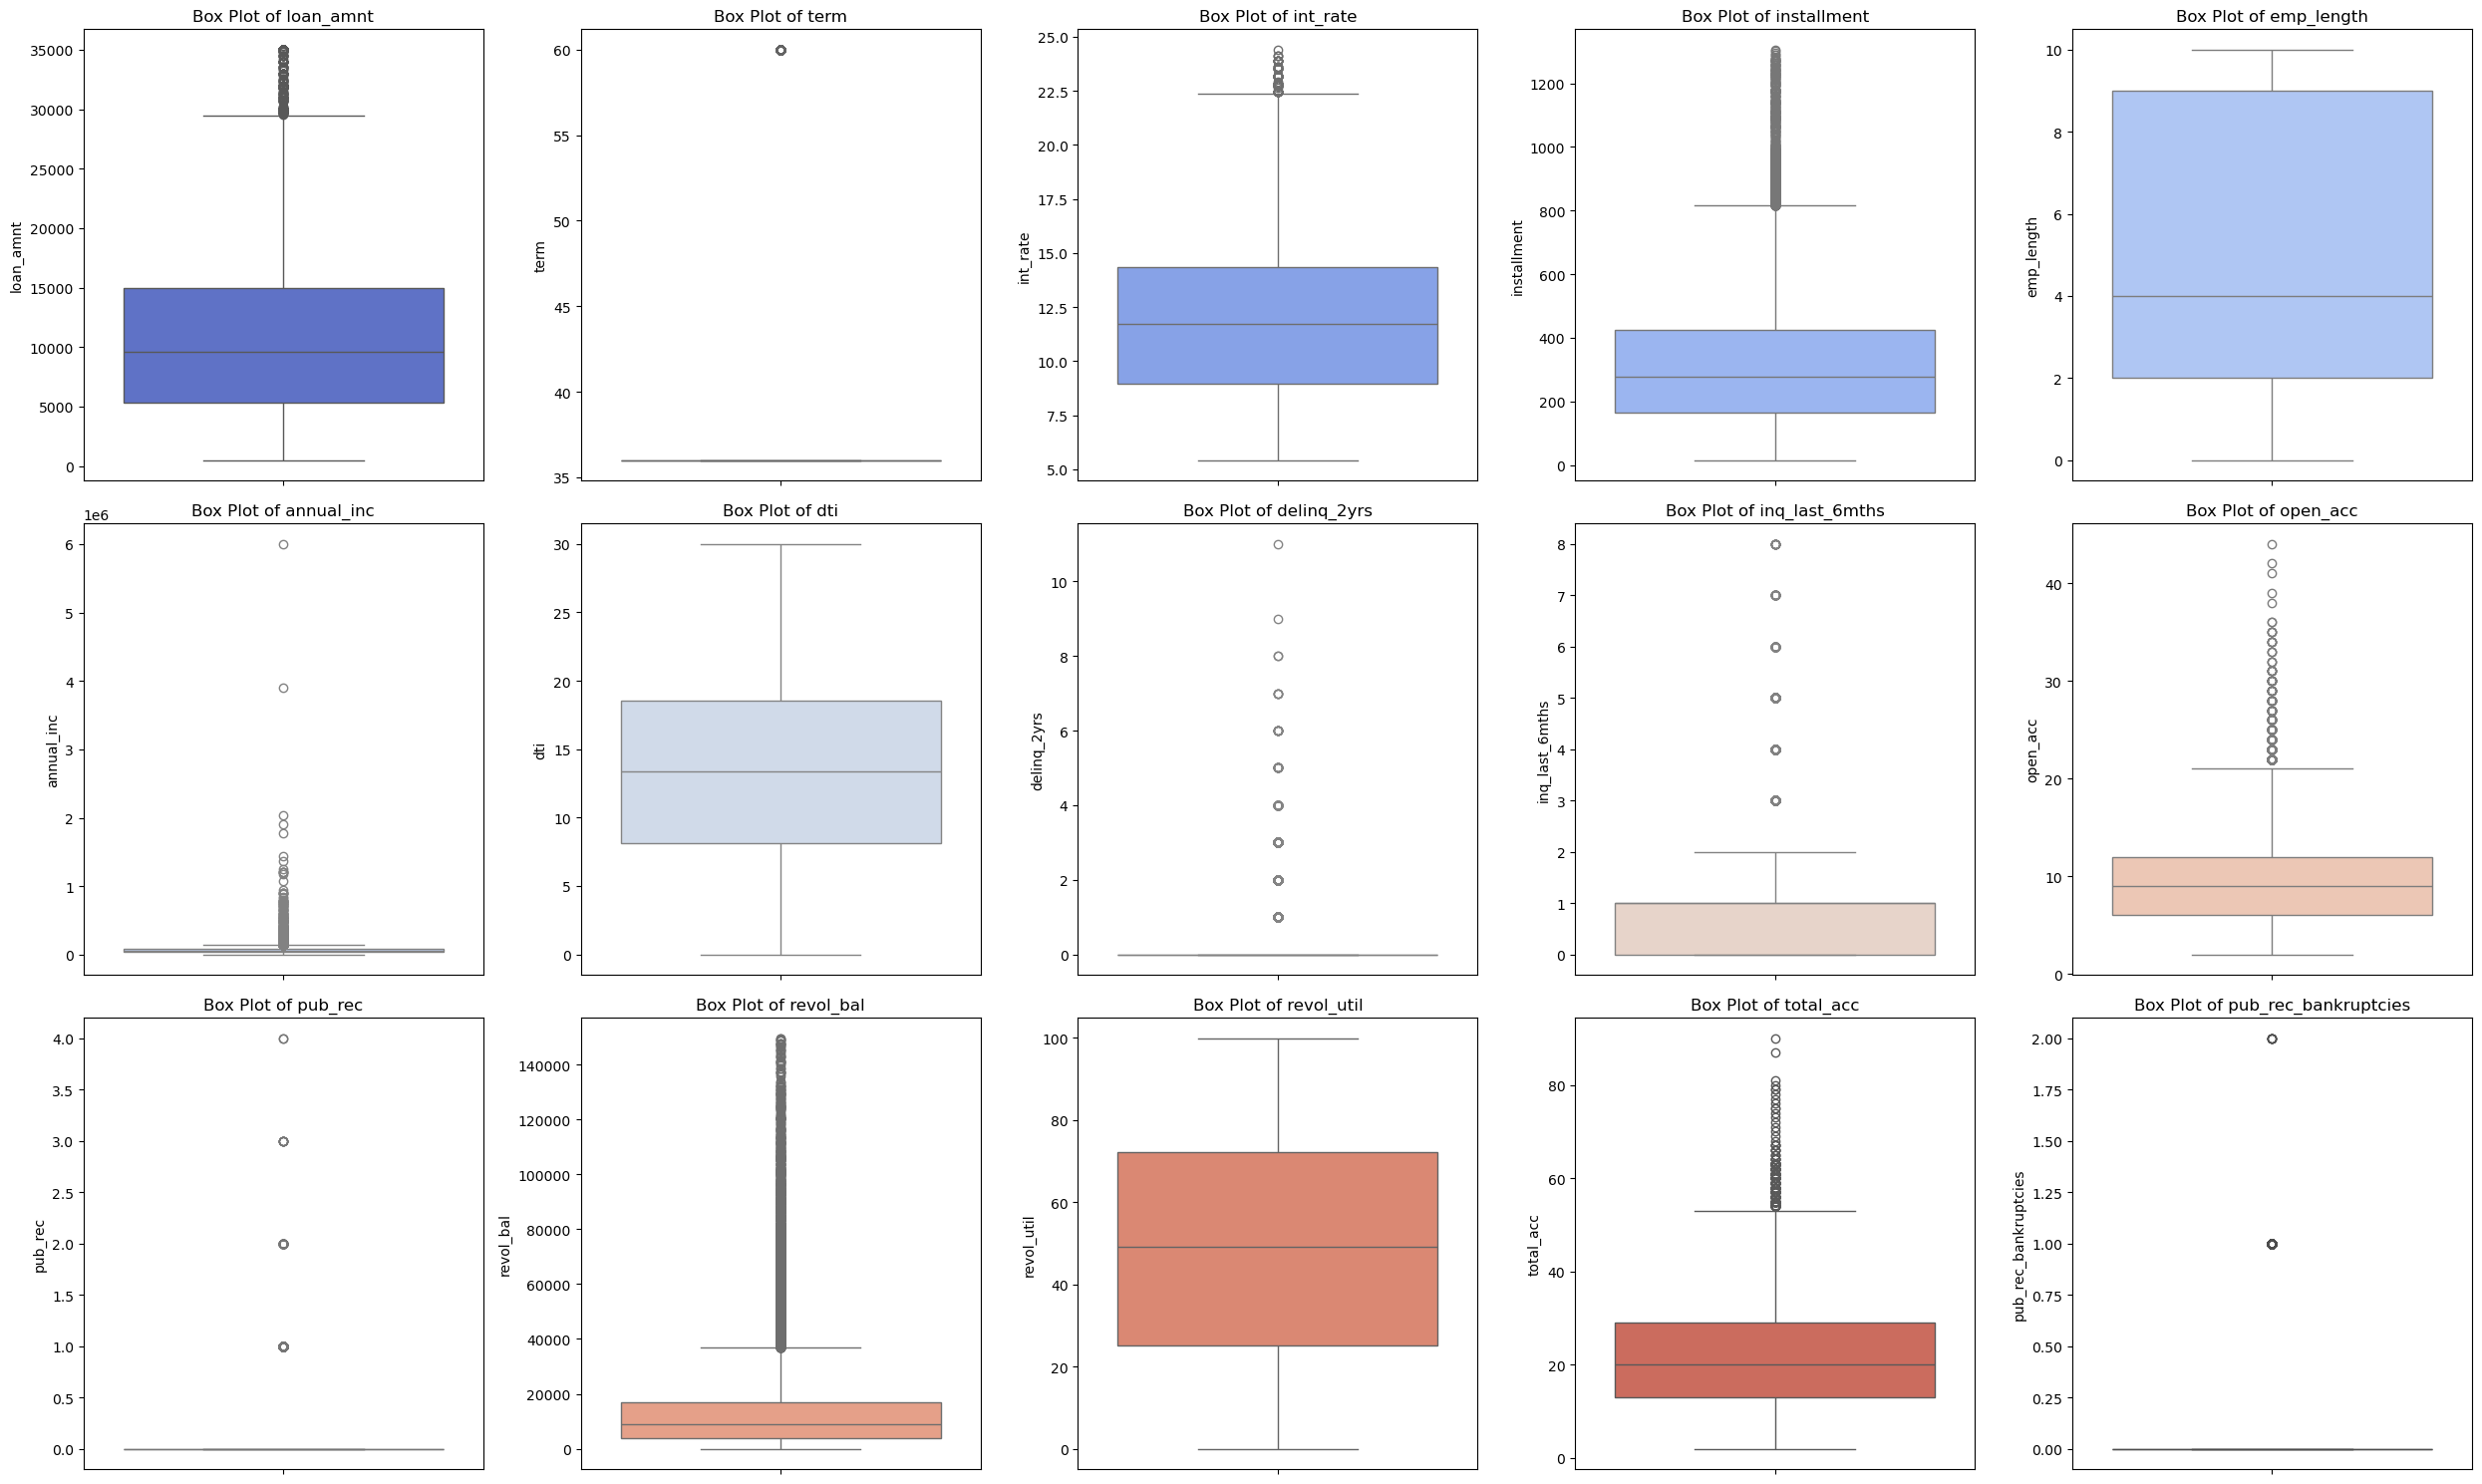

In [386]:
generate_box_plot(loan_data,numeric_outliers_columns, 5)  #5 columns in below subplots

We can see emp_length, dti and revol_util has no outliers, so we will not examine it's outliers

In [387]:
no_outlier_columns = ['emp_length','dti','revol_util']
numeric_outliers_columns = list(numeric_outliers_columns) #converting column index to list, in order to remove columns with no outliers
for no_outlier_col in no_outlier_columns:
    numeric_outliers_columns.remove(no_outlier_col)

print('Columns to examine for outliers: ' , numeric_outliers_columns)

Columns to examine for outliers:  ['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'pub_rec_bankruptcies']


Examine quantiles for each columns to find potential outliers

In [388]:
quantiles = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
loan_data[numeric_outliers_columns].quantile(quantiles).T

,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00
loan_amnt,21600.00,23000.00,24000.0000,25000.00,25000.00,25000.00,25000.00,28000.0000,30000.00,35000.00,35000.00
term,60.00,60.00,60.0000,60.00,60.00,60.00,60.00,60.0000,60.00,60.00,60.00
int_rate,16.82,17.14,17.3204,17.56,17.99,18.30,18.67,19.2900,19.91,20.90,24.40
installment,620.90,645.26,662.9716,682.74,710.03,760.82,805.08,831.3003,870.39,931.09,1305.19
annual_inc,115000.00,120000.00,122000.0000,127082.97,134000.00,140004.00,150000.00,165000.0000,187000.00,234000.00,6000000.00
delinq_2yrs,1.00,1.00,1.0000,1.00,1.00,1.00,1.00,1.0000,2.00,2.00,11.00
inq_last_6mths,2.00,3.00,3.0000,3.00,3.00,3.00,3.00,3.0000,3.00,4.00,8.00
open_acc,15.00,16.00,16.0000,16.00,17.00,17.00,18.00,19.0000,20.00,22.00,44.00
pub_rec,0.00,0.00,0.0000,0.00,0.00,1.00,1.00,1.0000,1.00,1.00,4.00
revol_bal,28965.60,30725.62,32708.7200,35019.56,37803.54,41338.60,46022.04,52863.7000,63308.72,83295.27,149588.00


Based on the above table, we can identify sharp deviation.
1. loan_amnt: Remove outliers after the 96th percentile
2. term: No outliers to remove as the values are fixed (36 or 60)
3. int_rate: Remove outliers after the 99th percentile
4. installment: Remove outliers after the 98th percentile
5. annual_inc: Remove outliers after the 96th percentile
6. delinq_2yrs: Remove outliers after the 99th percentile
7. inq_last_6mths: Remove outliers after the 98th percentile (It was 3 continously from 95 to 98 percentiles)
8. open_acc: Remove outliers after the 98th percentile
9. pub_rec: Remove outliers after the 99th percentile (Anyways from 95 to 99 percentiles, it is 1)
10. revol_bal: Remove outliers after the 95th percentile
11. total_acc: Remove outliers after the 98th percentile (values > 51)
12. pub_rec_bankruptcies: Remove outliers after the 99th percentile

In [389]:
# Threshold 
quantiles = {
    'loan_amnt': 0.96,
    'int_rate': 0.99,
    'installment': 0.98,
    'annual_inc': 0.96,
    'delinq_2yrs': 0.99,
    'inq_last_6mths': 0.98,
    'open_acc': 0.98,
    'pub_rec': 0.99,
    'revol_bal': 0.95,
    'total_acc': 0.98,
    'pub_rec_bankruptcies': 0.99
}

# find total outliers in each column that we are examining
outlier_counts = {}
for col, percentile in quantiles.items():
    threshold = loan_data[col].quantile(percentile)
    count_above_threshold = (loan_data[col] > threshold).sum()
    outlier_counts[col] = count_above_threshold

# Convert the result to a DataFrame for better visualization
outlier_counts_df = pd.DataFrame(outlier_counts.items(), columns=['Column', 'Total Outliers above threshold'])
outlier_counts_df["Percentage of records that are outliers"] = np.round(100 * outlier_counts_df['Total Outliers above threshold'] / len(loan_data),2).astype(str) + "%"
outlier_counts_df


,Column,Total Outliers above threshold,Percentage of records that are outliers
0,loan_amnt,1430,3.72%
1,int_rate,384,1.0%
2,installment,768,2.0%
3,annual_inc,1478,3.84%
4,delinq_2yrs,309,0.8%
5,inq_last_6mths,570,1.48%
6,open_acc,728,1.89%
7,pub_rec,56,0.15%
8,revol_bal,1923,5.0%
9,total_acc,692,1.8%


As outliers are very less for each column, we will delete them.

In [390]:
loan_data_len_with_outliers = len(loan_data)
print('Total entries including outliers: ', loan_data_len_with_outliers)

#Removing the outliers
for col, percentile in quantiles.items():
    threshold = loan_data[col].quantile(percentile)
    loan_data = loan_data[loan_data[col] <= threshold]

loan_data_len_without_outliers = len(loan_data)
print('Total entries excluding outliers: ', loan_data_len_without_outliers)

print('No. of records retained after deleting outliers: ', np.round(100 * loan_data_len_without_outliers/loan_data_len_with_outliers,2),'%' )

Total entries including outliers:  38442
Total entries excluding outliers:  30967
No. of records retained after deleting outliers:  80.56 %


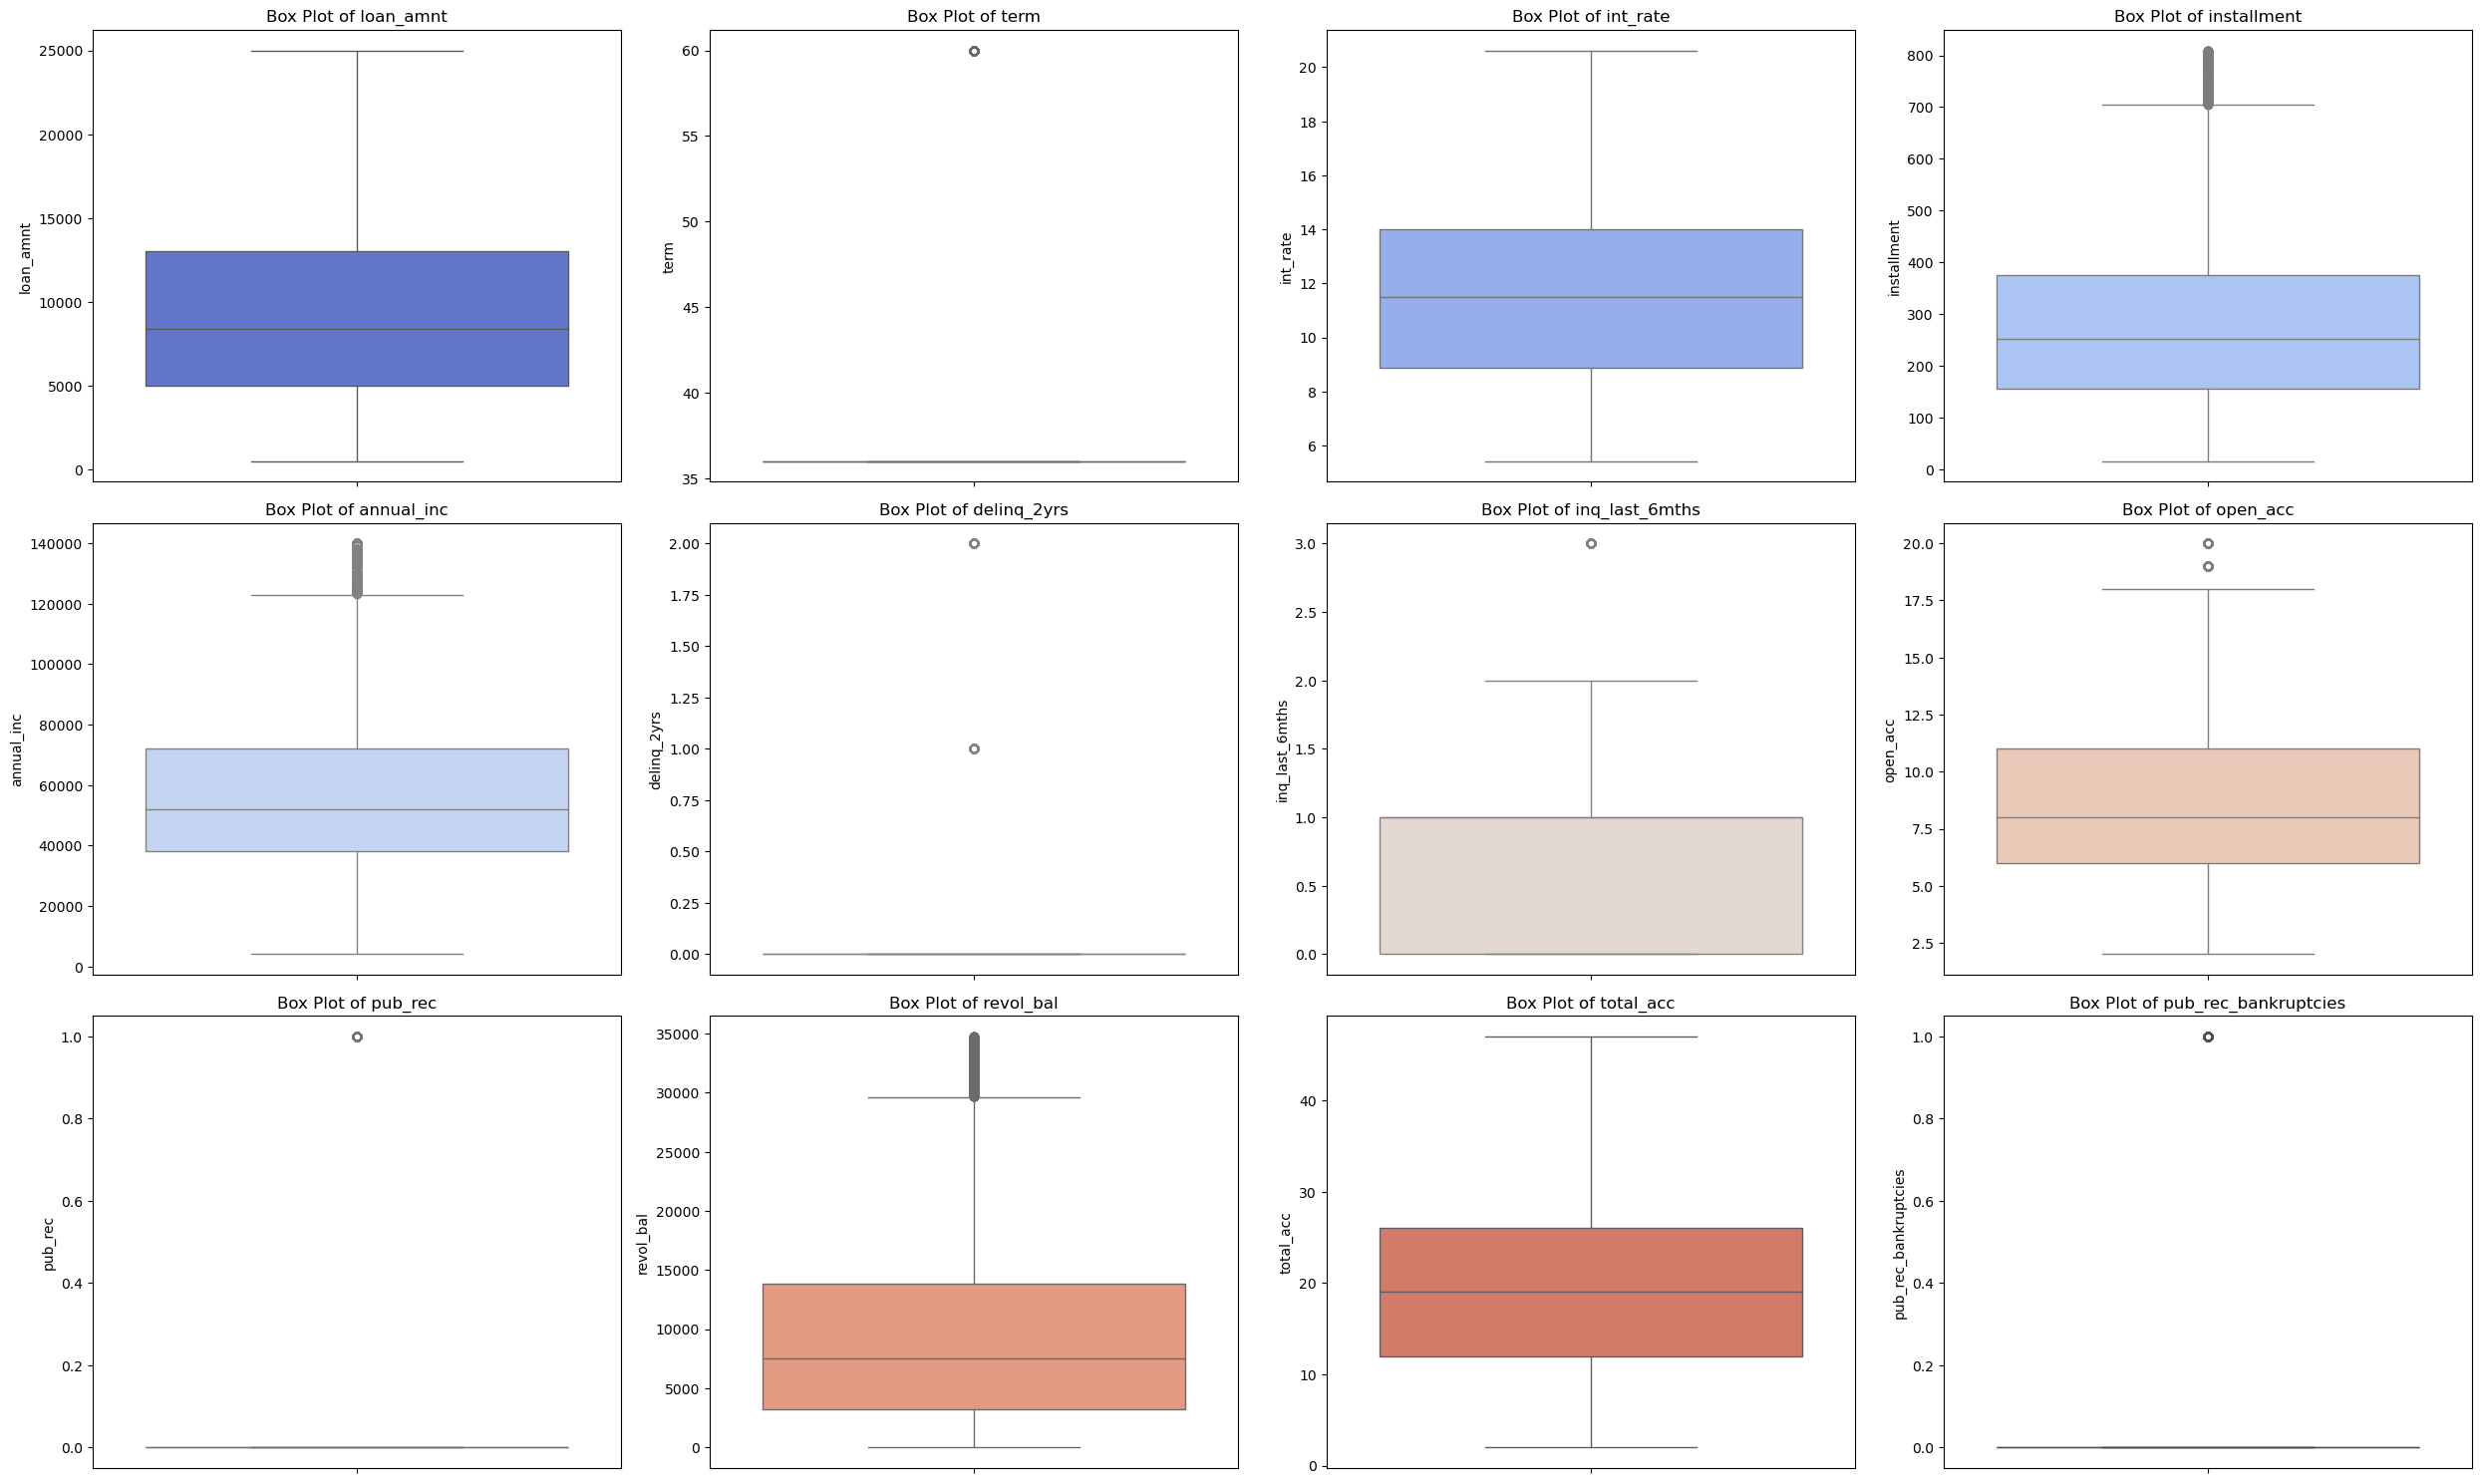

In [391]:
generate_box_plot(loan_data,numeric_outliers_columns, 4) #4 columns in below subplots

Although, there are still few outliers. But we will be retaining them to retain the data. Also, we can observe in above boxplot distribution has git better after removing outliers. 

In [392]:
loan_data.shape

(30967, 24)

### Sanity Checks

1. Earliest credit line date cannot be more than issue date. Assuming, this entries were recorded during time of issuing the loan
2. Loan amount matches the calculation of term, installment and interest rate. 

In [393]:
print('Number of records with credit line date is more than issue date: ', len(loan_data[loan_data["earliest_cr_line"] > loan_data["issue_d"]]))

Number of records with credit line date is more than issue date:  0


So, there is no wrong entries where credit line date is more than issue date

In [394]:
def calculate_loan_amount(installment, term, int_rate):
    # Convert annual rate to monthly
    monthly_rate = (int_rate / 100) / 12
    # Calculate loan amount using the formula for an annuity
    loan_amnt = installment * (1 - (1 + monthly_rate) ** -term) / monthly_rate
    return np.round(loan_amnt).astype(int) #Loan Amount is in integer datatype


In [395]:
# Calculate loan amount for each row
calculated_loan_amnt = loan_data.apply(lambda row: calculate_loan_amount(row['installment'], row['term'], row['int_rate']), axis=1)
print('Number of records with miscalculated loan amount: ', loan_data[loan_data.loan_amnt != calculated_loan_amnt].shape[0])

Number of records with miscalculated loan amount:  2675


In [396]:
#We will drop miscalculated loan amount records
loan_data = loan_data[loan_data.loan_amnt == calculated_loan_amnt]
print('Shape after dropping miscalulated loan amount records: ', loan_data.shape)

Shape after dropping miscalulated loan amount records:  (28292, 24)


---
### Derived Metrics

In [397]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [398]:
def check_distribution(data_frame,col):
    print(f"{col} Distribution:")
    
    # Calculate descriptive statistics
    desc_stats = loan_data[col].describe()

    # Calculate the IQR
    Q1 = desc_stats['25%']
    Q3 = desc_stats['75%']
    IQR = Q3 - Q1

    # Calculate whisker values
    lower_whisker_normalised = max(desc_stats['min'],Q1 - 1.5 * IQR)
    upper_whisker_normalised = min(desc_stats['max'],Q3 + 1.5 * IQR)

    # Add whisker values to the descriptive statistics table
    desc_stats['lower_fence_normalised'] = lower_whisker_normalised
    desc_stats['upper_fence_normalised'] = upper_whisker_normalised

    # Convert to DataFrame for better presentation
    desc_stats_df = desc_stats.to_frame()
    print(desc_stats_df)

    data_frame[col].plot.box()
    plt.show()

1. Derive metrics that can be useful during analyzing annual income:<br>
    a. Income Brackets<br>

annual_inc Distribution:
                           annual_inc
count                    28292.000000
mean                     56403.345598
std                      25807.216686
min                       4000.000000
25%                      37266.450000
50%                      51998.000000
75%                      70800.000000
max                     140000.000000
lower_fence_normalised    4000.000000
upper_fence_normalised  121100.325000


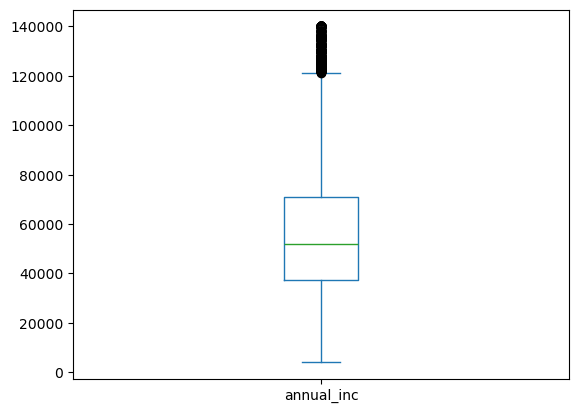

In [399]:
#let's check Annual Income Distribution to create brackets
check_distribution(loan_data,"annual_inc")

In [400]:
#Assigning Income Brackets
income_bins = [0, 37266, 51998, 70800, 121100, float('inf')]
income_labels = ['Low ($0 - $37,266)', 'Lower-Middle ($37,266 - $51,998)', 'Middle ($51,998 - $70,800)', 'Upper-Middle ($70,800 - $1,21,100)', 'High ($1,21,100+)']
loan_data['annual_income_bracket'] = pd.cut(loan_data['annual_inc'], bins=income_bins, labels=income_labels)
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,annual_income_bracket
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.0,"Low ($0 - $37,266)"
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.0,"Low ($0 - $37,266)"
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0,"Lower-Middle ($37,266 - $51,998)"
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.0,"Low ($0 - $37,266)"
6,7000,60,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,NC,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.0,"Lower-Middle ($37,266 - $51,998)"


2. Derive metrics that can be useful during analyzing loan issue date:<br>
    a. Month<br>
    b. Year<br>
    c. Quarter

In [401]:
# Get month, year and quarter from issue_d
loan_data['issue_month'] = loan_data['issue_d'].dt.month
loan_data['issue_year'] = loan_data['issue_d'].dt.year
loan_data['issue_quarter'] = loan_data['issue_d'].dt.quarter
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,annual_income_bracket,issue_month,issue_year,issue_quarter
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.0,"Low ($0 - $37,266)",12,2011,4
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.0,"Low ($0 - $37,266)",12,2011,4
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0,"Lower-Middle ($37,266 - $51,998)",12,2011,4
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.0,"Low ($0 - $37,266)",12,2011,4
6,7000,60,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,NC,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.0,"Lower-Middle ($37,266 - $51,998)",12,2011,4


3. Derive metrics that can be useful during analyzing earliest credit history:<br>
    a. Year<br>
    b. Earliest credit history at the time of issue_d

In [402]:
loan_data['issue_year'] = loan_data['earliest_cr_line'].dt.year
loan_data['years_since_earliest_credit_during_issue'] = loan_data['issue_d'].dt.year - loan_data['earliest_cr_line'].dt.year
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,annual_income_bracket,issue_month,issue_year,issue_quarter,years_since_earliest_credit_during_issue
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.0,"Low ($0 - $37,266)",12,1985,4,26
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.0,"Low ($0 - $37,266)",12,2001,4,10
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0,"Lower-Middle ($37,266 - $51,998)",12,1996,4,15
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.0,"Low ($0 - $37,266)",12,2004,4,7
6,7000,60,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,NC,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.0,"Lower-Middle ($37,266 - $51,998)",12,2005,4,6


4. Derive metrics that can be useful during analyzing loan amount:<br>
    a. Loan Amount bins<br>
    b. Loan Amount to Income Ratio<br>

loan_amnt Distribution:
                           loan_amnt
count                   28292.000000
mean                     9062.369221
std                      5447.159597
min                       500.000000
25%                      5000.000000
50%                      8000.000000
75%                     12000.000000
max                     25000.000000
lower_fence_normalised    500.000000
upper_fence_normalised  22500.000000


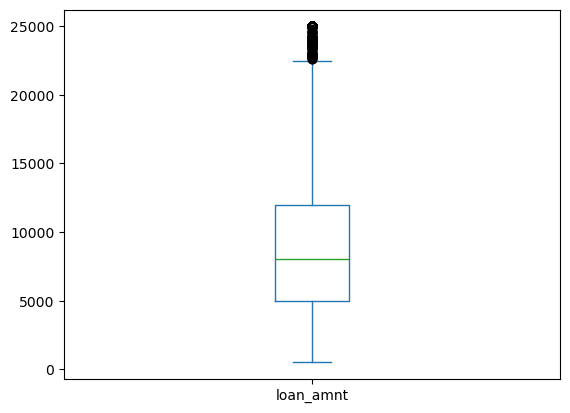

In [403]:
#First let's check Loan Amount Distribution to create bins
check_distribution(loan_data,"loan_amnt")

In [404]:
#Looking at above IQR, we can see interval of 5000, makes more sense for Loan bins
loan_amnt_bins = [0, 5000, 8000, 12000, 15000, 22500, float('inf')]
loan_amnt_labels = ['0-5k', '5k-8k', '8k-12k', '12k-15k', '15k-22.5k', '22.5k+']
loan_data['loan_amnt_bins'] = pd.cut(loan_data['loan_amnt'], bins=loan_amnt_bins, labels=loan_amnt_labels)


In [405]:
#Loan Amount to Income Ratio
loan_data['loan_amnt_income_ratio'] = np.round(loan_data['loan_amnt'] / loan_data['annual_inc'],2)
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,annual_income_bracket,issue_month,issue_year,issue_quarter,years_since_earliest_credit_during_issue,loan_amnt_bins,loan_amnt_income_ratio
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.0,"Low ($0 - $37,266)",12,1985,4,26,0-5k,0.21
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.0,"Low ($0 - $37,266)",12,2001,4,10,0-5k,0.20
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0,"Lower-Middle ($37,266 - $51,998)",12,1996,4,15,8k-12k,0.20
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.0,"Low ($0 - $37,266)",12,2004,4,7,0-5k,0.14
6,7000,60,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,NC,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.0,"Lower-Middle ($37,266 - $51,998)",12,2005,4,6,5k-8k,0.15


5. Derive metrics that can be useful during analyzing installments:<br>
    a. Installment to Loan ratio<br>
    b. Annual Installment as Percentage of Annual Income, or Monthly Installment as Percentage of Monthly Income<br>

In [406]:
#Installment to Loan ratio
loan_data['installment_to_loan_ratio'] = np.round(loan_data['installment'] / loan_data['loan_amnt'],2)
#Annual Installment as Percentage of Annual Income, or Monthly Installment as Percentage of Monthly Income
loan_data['installment_as_percent_of_monthly_income'] = np.round(100*(loan_data['installment'] * 12) / loan_data['annual_inc'],2)

loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,annual_income_bracket,issue_month,issue_year,issue_quarter,years_since_earliest_credit_during_issue,loan_amnt_bins,loan_amnt_income_ratio,installment_to_loan_ratio,installment_as_percent_of_monthly_income
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.0,"Low ($0 - $37,266)",12,1985,4,26,0-5k,0.21,0.03,8.14
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.0,"Low ($0 - $37,266)",12,2001,4,10,0-5k,0.20,0.04,8.26
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0,"Lower-Middle ($37,266 - $51,998)",12,1996,4,15,8k-12k,0.20,0.03,8.28
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.0,"Low ($0 - $37,266)",12,2004,4,7,0-5k,0.14,0.03,5.22
6,7000,60,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,NC,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.0,"Lower-Middle ($37,266 - $51,998)",12,2005,4,6,5k-8k,0.15,0.02,4.34


6. Derive metrics that can be useful during analyzing dti:<br>
    a. dti risk brackets<br>

dti Distribution:
                                 dti
count                   28292.000000
mean                       13.107292
std                         6.667924
min                         0.000000
25%                         7.950000
50%                        13.140000
75%                        18.360000
max                        29.990000
lower_fence_normalised      0.000000
upper_fence_normalised     29.990000


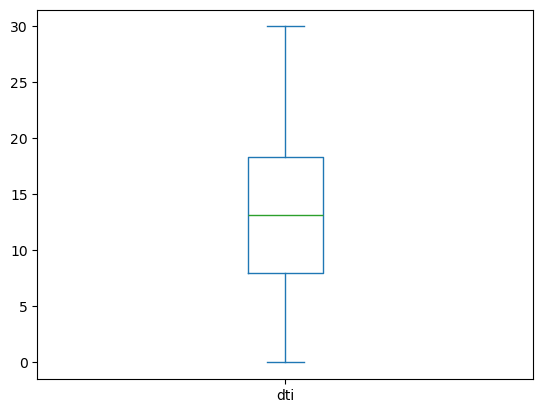

In [407]:
#let's check DTI Distribution to create brackets
check_distribution(loan_data,"dti")

In [408]:
#Assign DTI risk brackets
dti_bins = [0, 7.95, 13.14, 18.36, float('inf')]
dti_labels = ['Low', 'Moderate', 'High', 'Very High']
loan_data['dti_bracket'] = pd.cut(loan_data['dti'], bins=dti_bins, labels=dti_labels)
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,annual_income_bracket,issue_month,issue_year,issue_quarter,years_since_earliest_credit_during_issue,loan_amnt_bins,loan_amnt_income_ratio,installment_to_loan_ratio,installment_as_percent_of_monthly_income,dti_bracket
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.0,"Low ($0 - $37,266)",12,1985,4,26,0-5k,0.21,0.03,8.14,Very High
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.0,"Low ($0 - $37,266)",12,2001,4,10,0-5k,0.20,0.04,8.26,Moderate
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0,"Lower-Middle ($37,266 - $51,998)",12,1996,4,15,8k-12k,0.20,0.03,8.28,Very High
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.0,"Low ($0 - $37,266)",12,2004,4,7,0-5k,0.14,0.03,5.22,Moderate
6,7000,60,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,NC,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.0,"Lower-Middle ($37,266 - $51,998)",12,2005,4,6,5k-8k,0.15,0.02,4.34,Very High


7. Derive metrics that can be useful during analyzing annual income:<br>
    a. Revolving utilization Brackets<br>

revol_util Distribution:
                          revol_util
count                   28292.000000
mean                       48.335788
std                        28.270378
min                         0.000000
25%                        25.000000
50%                        48.500000
75%                        71.700000
max                        99.900000
lower_fence_normalised      0.000000
upper_fence_normalised     99.900000


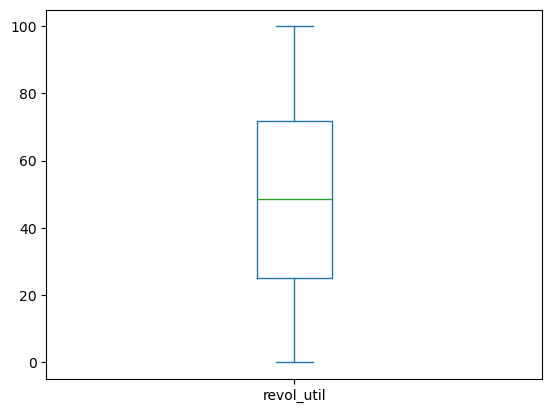

In [409]:
#let's check Revolving Utilization to create brackets
check_distribution(loan_data,"revol_util")

In [410]:
#Assign Revolving Utilization brackets
revol_util_bins = [0, 25, 48.5, 71.7, float('inf')]
revol_util_labels = ['Low utilization', 'Medium utilization', 'High utilization', 'Very high utilization']
loan_data['revol_util_bracket'] = pd.cut(loan_data['revol_util'], bins=revol_util_bins, labels=revol_util_labels)
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,annual_income_bracket,issue_month,issue_year,issue_quarter,years_since_earliest_credit_during_issue,loan_amnt_bins,loan_amnt_income_ratio,installment_to_loan_ratio,installment_as_percent_of_monthly_income,dti_bracket,revol_util_bracket
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.0,"Low ($0 - $37,266)",12,1985,4,26,0-5k,0.21,0.03,8.14,Very High,Very high utilization
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.0,"Low ($0 - $37,266)",12,2001,4,10,0-5k,0.20,0.04,8.26,Moderate,Very high utilization
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0,"Lower-Middle ($37,266 - $51,998)",12,1996,4,15,8k-12k,0.20,0.03,8.28,Very High,Low utilization
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.0,"Low ($0 - $37,266)",12,2004,4,7,0-5k,0.14,0.03,5.22,Moderate,Medium utilization
6,7000,60,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,NC,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.0,"Lower-Middle ($37,266 - $51,998)",12,2005,4,6,5k-8k,0.15,0.02,4.34,Very High,Very high utilization


### Initial Analysis
Check the percentage of Target Variable (Loan Status)

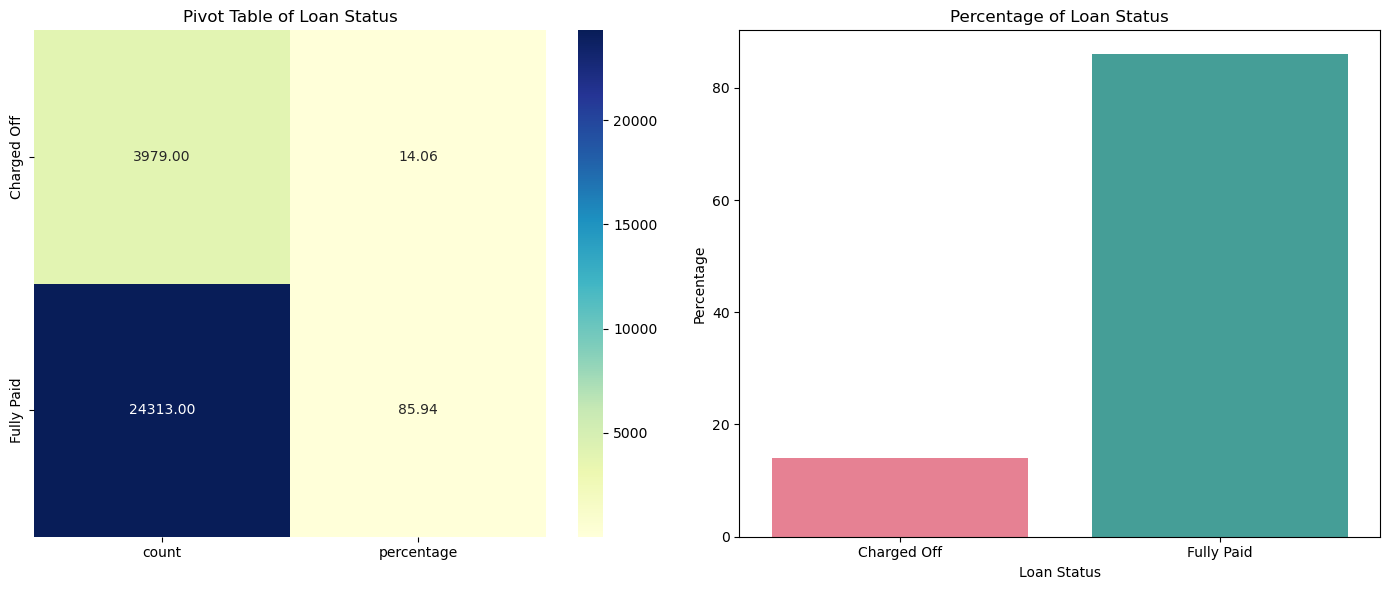

In [411]:
#Create a pivot table
loan_status_pivot_table = loan_data.pivot_table(index='loan_status', aggfunc='size', fill_value=0).reset_index(name='count')

#Calculate percentages
total = loan_status_pivot_table['count'].sum()
loan_status_pivot_table['percentage'] = (loan_status_pivot_table['count'] / total) * 100

#Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

#Plot the pivot table as a heatmap
sns.heatmap(loan_status_pivot_table.set_index('loan_status'), annot=True, fmt='.2f', cmap='YlGnBu', ax=ax[0])
ax[0].set_title('Pivot Table of Loan Status')
ax[0].set_ylabel('')
ax[0].set_xlabel('')

#Bar chart for percentages with a better color palette
palette = sns.color_palette("husl", len(loan_status_pivot_table['loan_status'].unique()))
sns.barplot(x='loan_status', y='percentage', data=loan_status_pivot_table, ax=ax[1], hue='loan_status', palette=palette, dodge=False, legend=False)
ax[1].set_title('Percentage of Loan Status')
ax[1].set_ylabel('Percentage')
ax[1].set_xlabel('Loan Status')

plt.tight_layout()
plt.show()

<b>Conclusion</b>: Approx. **86%** comsumers have **fully paid** the loan, while **14%** consumers turned out to be **defaulter** which is **concerning percent**.

### Analysis

1. Loan Amount
2. Annual Income
2. loan_amnt_income_ratio
3. int_rate
4. installment
6. dti
7. delinq_2yrs
8. inq_last_6mths
9. open_acc
10. pub_rec
11. revol_bal
12. revol_util
13. total_acc
14. pub_rec_bankruptcies
15. years_since_earliest_credit_during_issue
16. installment_to_loan_ratio
17. installment_as_percent_of_monthly_income

---
#### Functions

In [412]:
#Univariate Bar Plot Function

def univariate_bar_plot(data, col, title, x_label, y_label = 'Count'):
    # Plotting the bar plot
    ax = sns.countplot(x=col, data=data, hue=col, palette='viridis')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Adding values on top of each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
    
    plt.xticks(rotation=45) #Rotate ticks of x axis by 45 degree, for better readability
    plt.show()

In [413]:
#Bivariate Percentage Bar Plot Function

def bivariate_percent_bar_plot(data, x_col, y_col, title, x_label, y_label = 'Percentage', legend_loc='upper right'):
    # Calculate the counts
    group_count = data.groupby([x_col, y_col], observed=True).size().reset_index(name='count') #count of grouped column x and y
    total = data.groupby(x_col, observed=True).size().reset_index(name='total') #count of grouped column x

    # Merge the counts and calculate percentages
    group_count = pd.merge(group_count, total, on=x_col)
    group_count['percentage'] = group_count['count'] / group_count['total'] * 100

    # Plotting the percentage count plot for x_col vs y_col
    ax = sns.barplot(x=x_col, y='percentage', hue=y_col, data=group_count, palette='viridis')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Adding values on top of each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)

    # Change legend position
    ax.legend(loc=legend_loc)
    plt.xticks(rotation=45) #Rotate ticks of x axis by 45 degree, for better readability    
    plt.show()

In [414]:
#Univariate & Segmented Univariate - Box Plot Function
def univariate_box_plot(data, y_col, segment_col, title, x_label, y_label):
    #Plotting the box plot
    if segment_col is not None:
        sns.boxplot(x=segment_col, y=y_col, data=data, palette='viridis', hue=segment_col)
    else:
        sns.boxplot(y=y_col, data=data)
    plt.title(title)
    if x_label is not None:
        plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.xticks(rotation=45) #Rotate ticks of x axis by 45 degree, for better readability
    plt.show()

---
#### Multivariate analysis to find the correlation between the variables against loan status (loan_status_encoded)

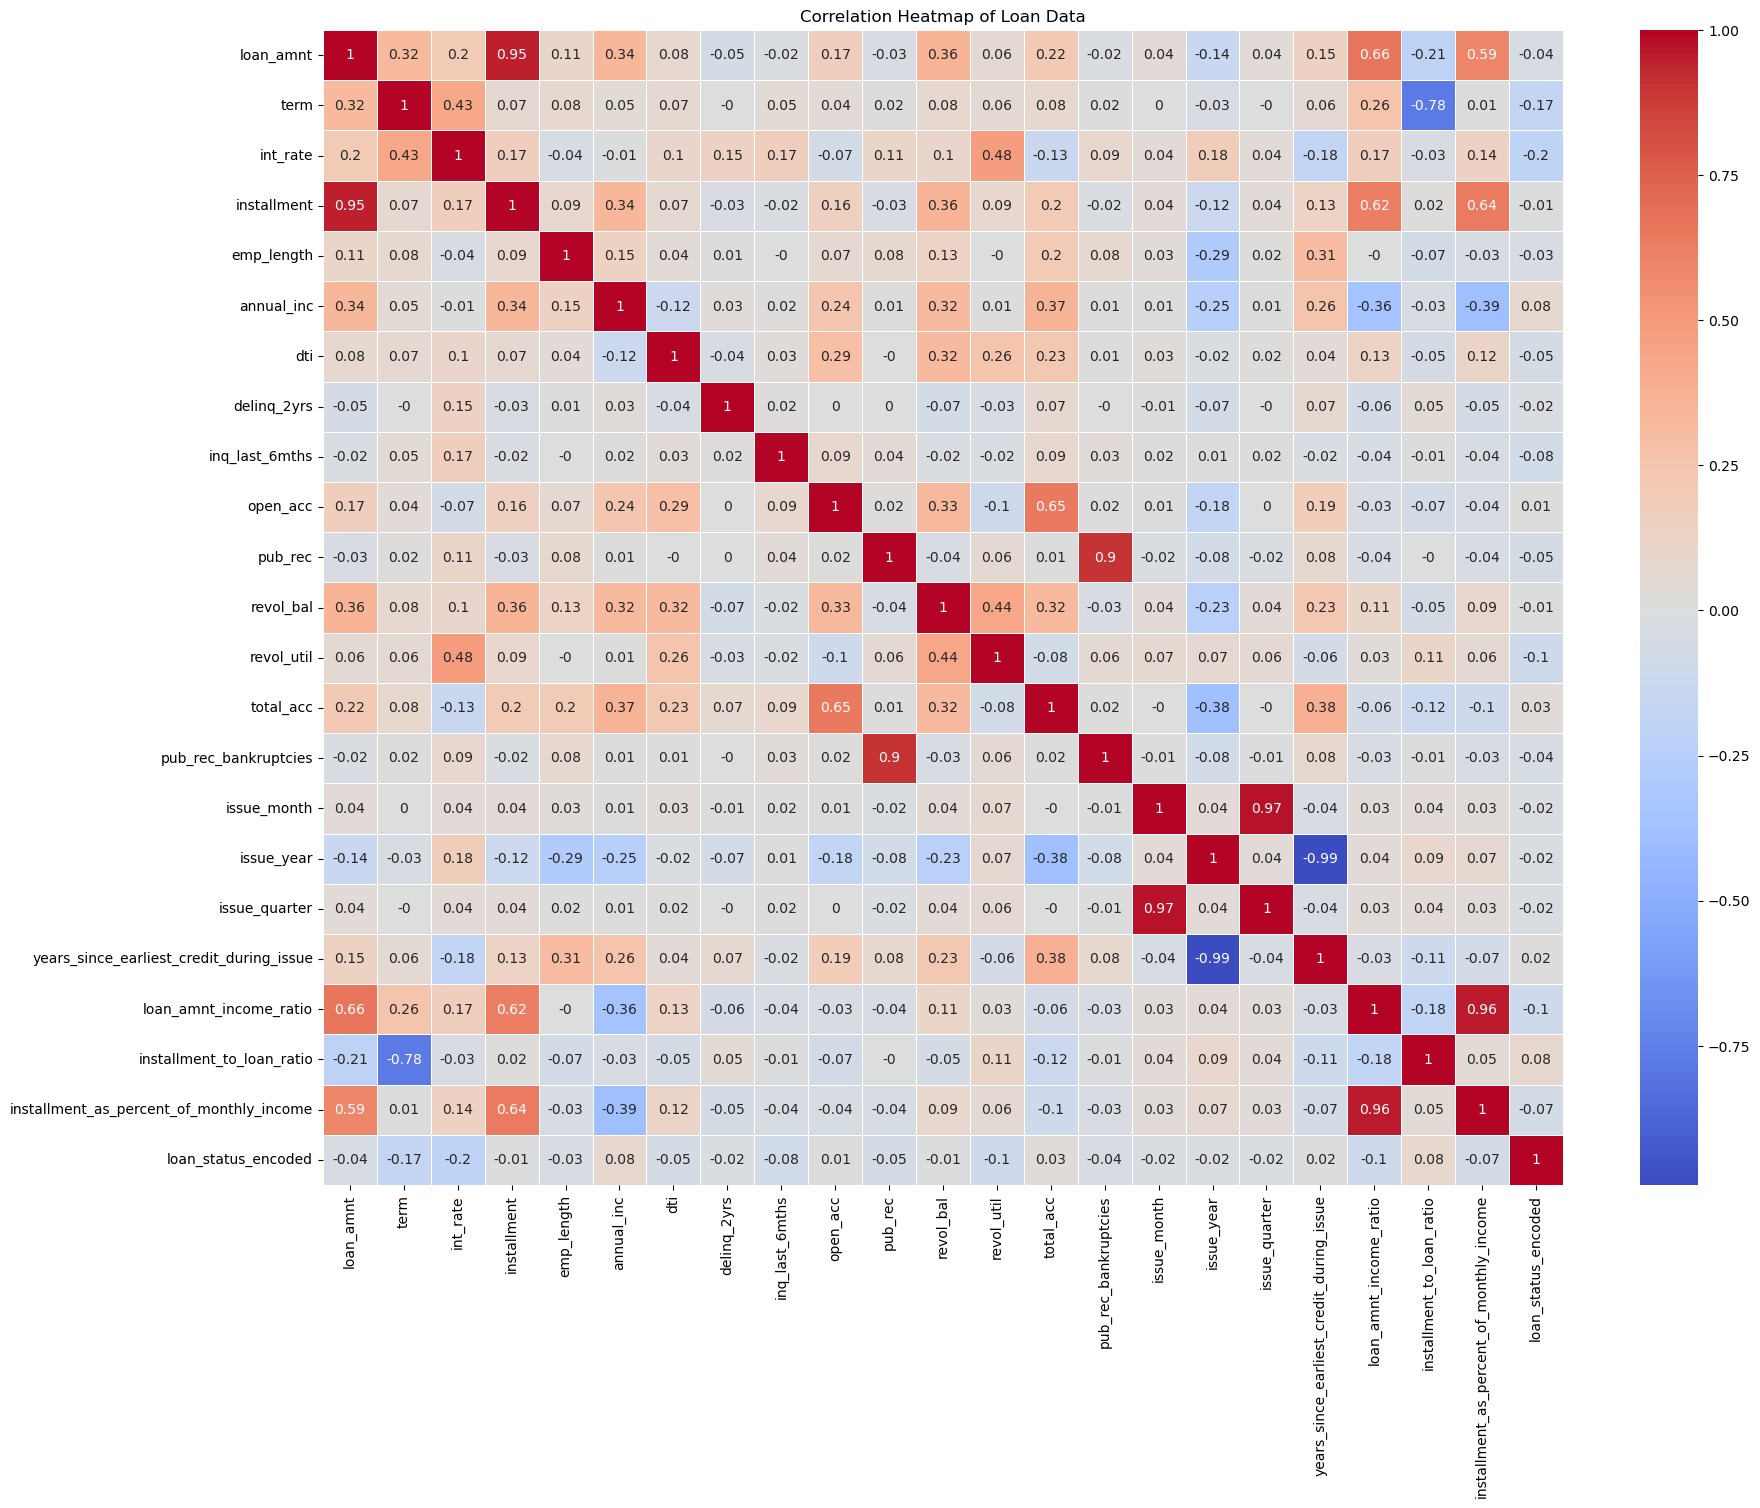

Correlation of all numeric varaibles against Loan Status:
loan_status_encoded                         1.00
installment_to_loan_ratio                   0.08
annual_inc                                  0.08
total_acc                                   0.03
years_since_earliest_credit_during_issue    0.02
open_acc                                    0.01
revol_bal                                  -0.01
installment                                -0.01
delinq_2yrs                                -0.02
issue_month                                -0.02
issue_year                                 -0.02
issue_quarter                              -0.02
emp_length                                 -0.03
pub_rec_bankruptcies                       -0.04
loan_amnt                                  -0.04
dti                                        -0.05
pub_rec                                    -0.05
installment_as_percent_of_monthly_income   -0.07
inq_last_6mths                             -0.08
revol_util 

In [415]:
# Encode 'loan_status' where 'Fully Paid' = 1 and 'Charged Off' = 0
loan_data['loan_status_encoded'] = loan_data['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

# Select relevant columns
relevant_columns = loan_data.select_dtypes(include=['number']).columns

# Calculate correlation matrix
corr_matrix = loan_data[relevant_columns].corr().round(2)

# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Loan Data')
plt.show()

# Correlation of all numeric varaibles against Loan Status
print("Correlation of all numeric varaibles against Loan Status:")
print(corr_matrix['loan_status_encoded'].sort_values(ascending=False))

<div class="alert alert-block alert-warning"><b>Conclusion:</b> There isn't any significant correlation between Loan Status and other variables</b></div>

---
#### 1. Loan Amount

<b>Univariate Analysis</b>

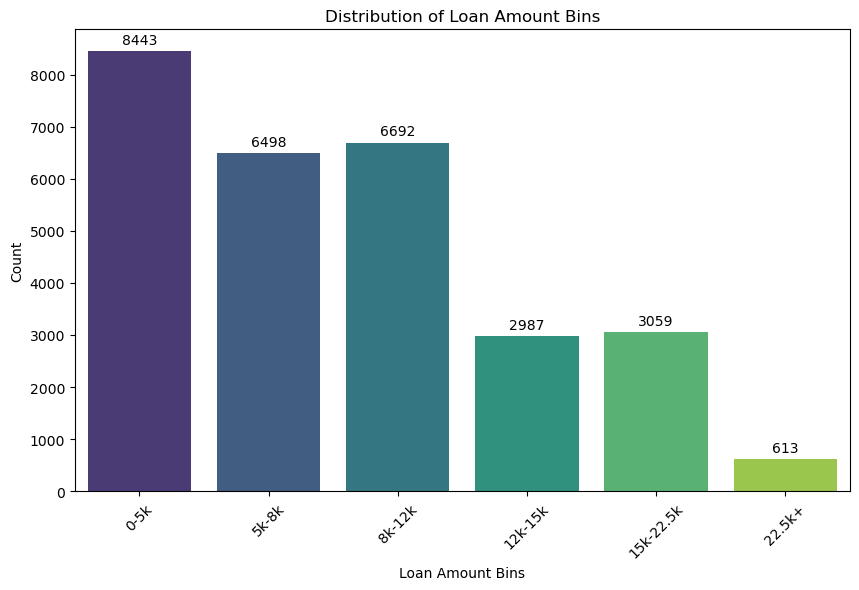

In [416]:
# Set size of plot
plt.figure(figsize=(10, 6))

# Plotting the bar plot for loan_amnt_bins
univariate_bar_plot(data = loan_data, col = 'loan_amnt_bins',title = 'Distribution of Loan Amount Bins',x_label = 'Loan Amount Bins')

<div class="alert alert-block alert-warning"><b>Conclusion:</b> Consumers has taken <b>most loans at $5k-$10k bucket</b> and <b>very few loans above 12k</b></div>

<b>Segmented Univariate Analysis</b>

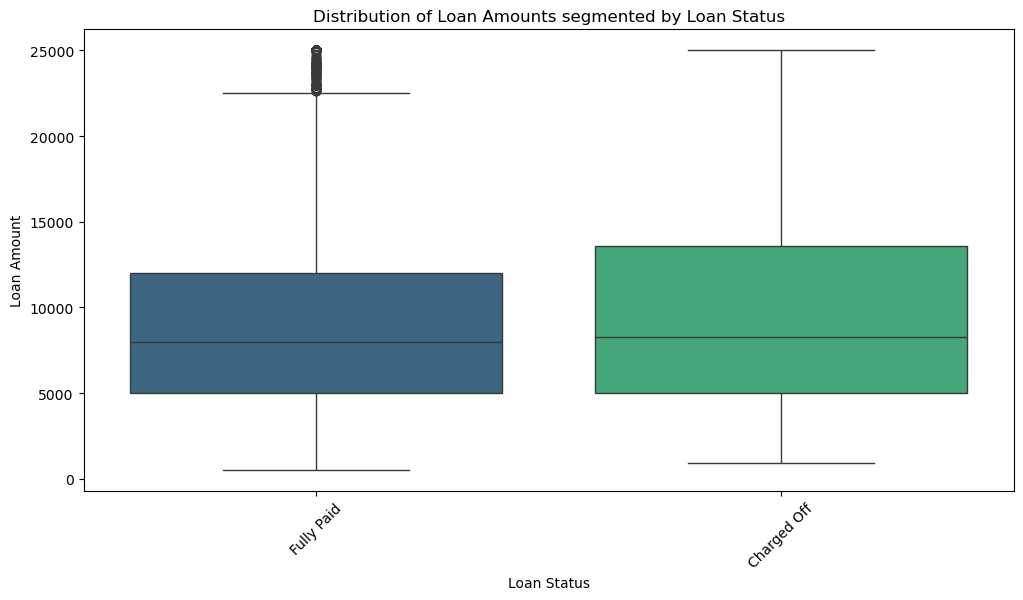

In [417]:
# Set size of plot
plt.figure(figsize=(12, 6))

#Plotting the box plot for loan_amnt segmented by loan_status
univariate_box_plot(data = loan_data, y_col = 'loan_amnt', segment_col = 'loan_status', 
                    title='Distribution of Loan Amounts segmented by Loan Status', 
                    x_label='Loan Status', y_label='Loan Amount')

<div class="alert alert-block alert-success"><b>Conclusion:</b>  75th percentile of charged-off loans is higher than 75th percentile of fully paid loans. This means <b>Higher loan amounts are more likely to be charged off.</b> </div>

<b>Bivariate Analysis</b>

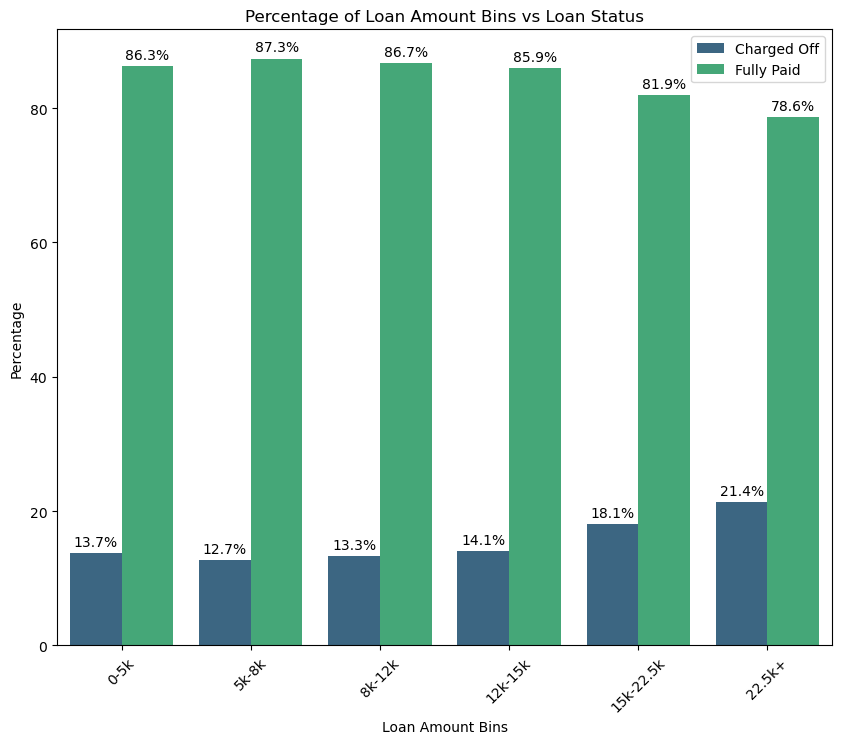

In [418]:
# Set size of plot
plt.figure(figsize=(10, 8))

# Plotting the percentage count plot for loan_amnt_bins vs loan_status
bivariate_percent_bar_plot(data = loan_data, x_col = "loan_amnt_bins",
                            y_col = "loan_status", title = 'Percentage of Loan Amount Bins vs Loan Status',
                              x_label = 'Loan Amount Bins')

<div class="alert alert-block alert-success"><b>Conclusion:</b>  Loan amount with more than $15K has higher chance of being defaulted / charged-off</b> </div>

---
#### 2. Annual Income

<b>Univariate Analysis</b>

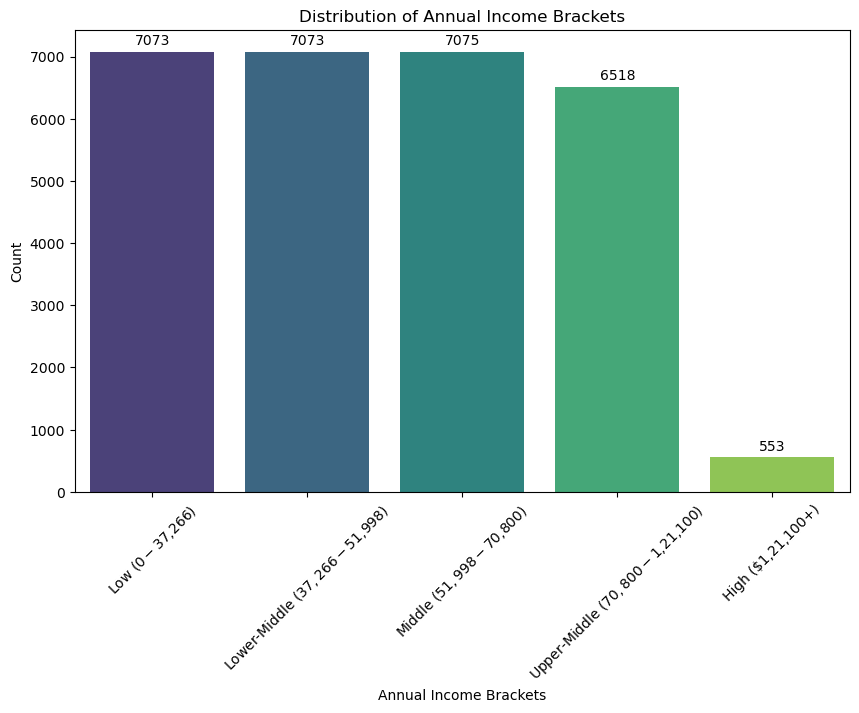

In [419]:
# Set size of plot
plt.figure(figsize=(10, 6))

# Plotting the bar plot for annual_income_bracket
univariate_bar_plot(data = loan_data, col = 'annual_income_bracket',title = 'Distribution of Annual Income Brackets',x_label = 'Annual Income Brackets')

<div class="alert alert-block alert-warning"><b>Conclusion:</b> Consumers with high annual income ($1,21,100+) don't apply for loans frequently</b></div>

<b>Segmented Univariate Analysis</b>

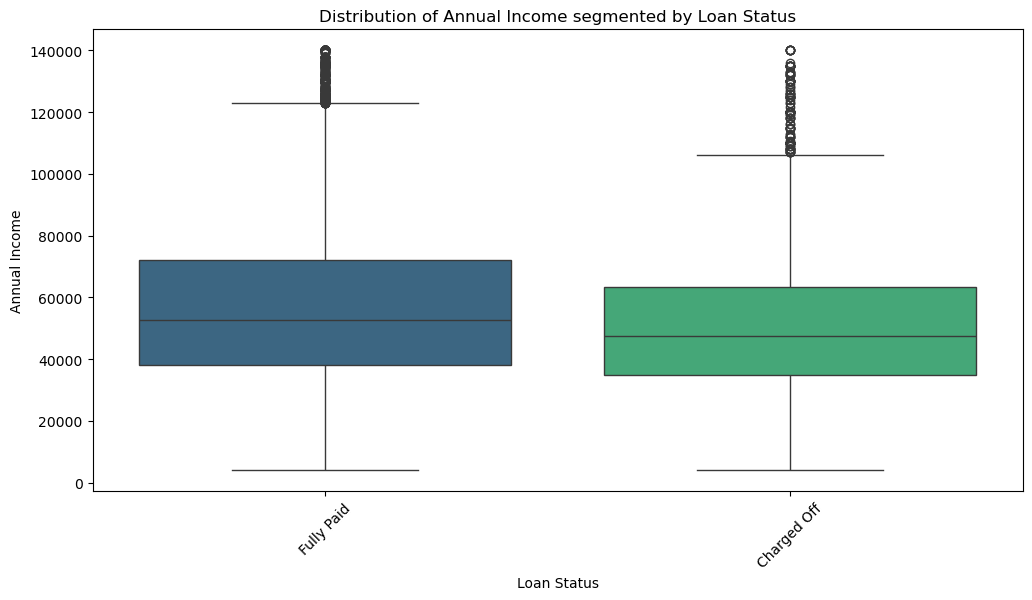

In [420]:
# Set size of plot
plt.figure(figsize=(12, 6))

#Plotting the box plot for annual_inc segmented by loan_status
univariate_box_plot(data = loan_data, y_col = 'annual_inc', segment_col = 'loan_status', 
                    title='Distribution of Annual Income segmented by Loan Status', 
                    x_label='Loan Status', y_label='Annual Income')

<div class="alert alert-block alert-success"><b>Conclusion:</b>  75th percentile and upper of charged-off loans is lower than 75th percentile of fully paid loans. This means <b>lower annual income group are more likely to be defaulted.</b> </div>

<b>Bivariate Analysis</b>

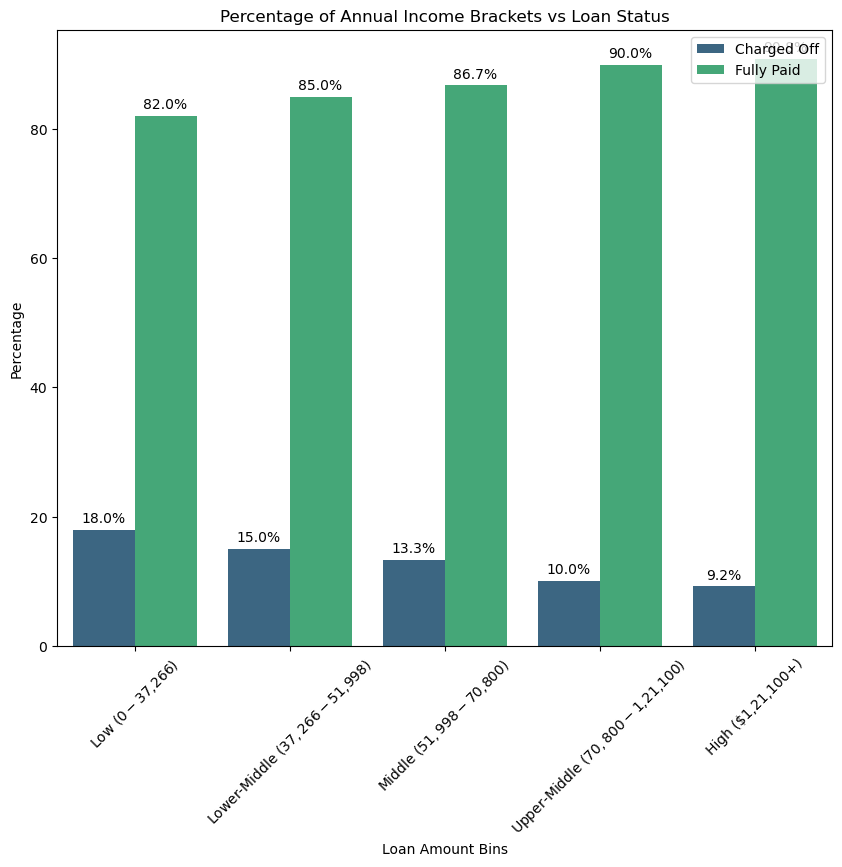

In [421]:
# Set size of plot
plt.figure(figsize=(10, 8))

# Plotting the percentage count plot for annual_income_bracket vs loan_status
bivariate_percent_bar_plot(data = loan_data, x_col = "annual_income_bracket",
                            y_col = "loan_status", title = 'Percentage of Annual Income Brackets vs Loan Status',
                              x_label = 'Loan Amount Bins')

<div class="alert alert-block alert-success"><b>Conclusion:</b> There is direct relationship between fully paid loan and Annual Income. Lower Income Group has lower chance of loan being fully paid, while Higher Income Group has higher chance of loan being fully paid</b> </div>

---
#### 3 Loan Amount to Income Ratio

<b>Univariate Analysis</b>

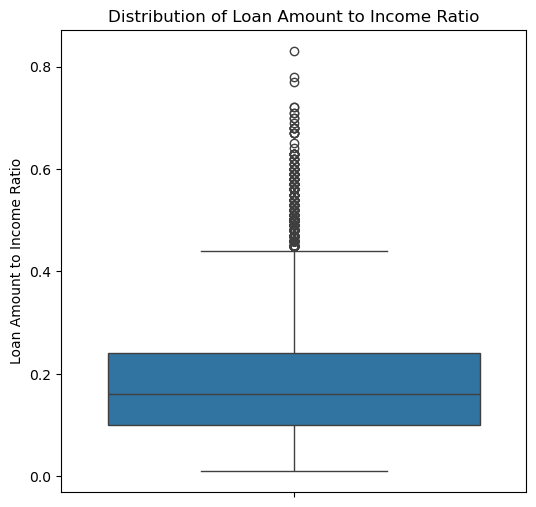

count    28292.000000
mean         0.178721
std          0.108696
min          0.010000
25%          0.100000
50%          0.160000
75%          0.240000
max          0.830000
Name: loan_amnt_income_ratio, dtype: float64

In [422]:
# Set size of plot
plt.figure(figsize=(6, 6))

#Plotting the box plot for loan_amnt_income_ratio
univariate_box_plot(data = loan_data, y_col = 'loan_amnt_income_ratio',  
                    title='Distribution of Loan Amount to Income Ratio', segment_col = None,
                    x_label=None, y_label='Loan Amount to Income Ratio')
loan_data['loan_amnt_income_ratio'].describe()

<div class="alert alert-block alert-warning"><b>Conclusion:</b> On Median, Consumer took 16% of their annual income as total loan amount</b></div>

<b>Segmented Univariate Analysis</b>

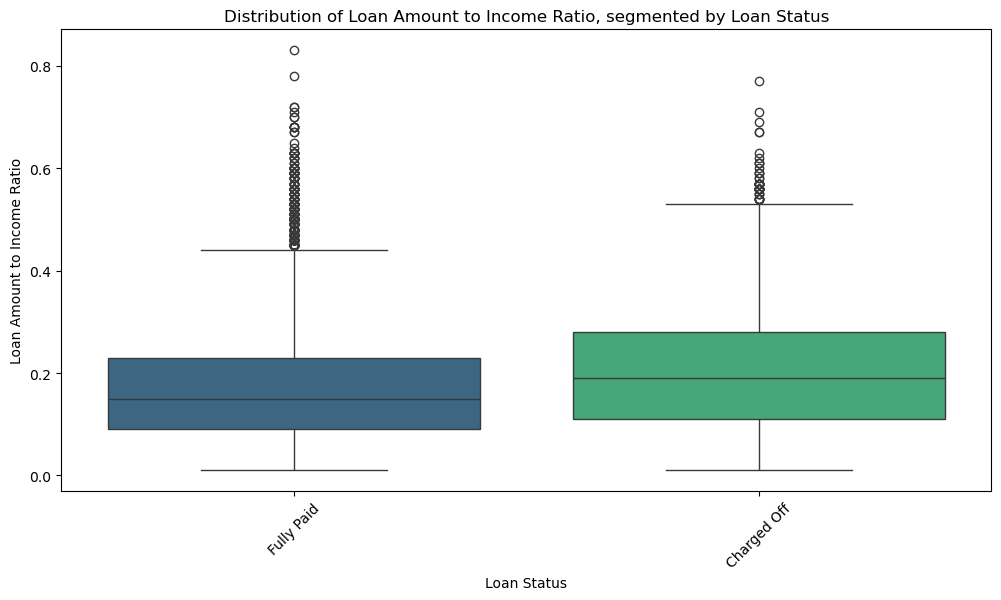

In [423]:
# Set size of plot
plt.figure(figsize=(12, 6))

#Plotting the box plot for loan_amnt_income_ratio segmented by loan_status
univariate_box_plot(data = loan_data, y_col = 'loan_amnt_income_ratio', segment_col = 'loan_status', 
                    title='Distribution of Loan Amount to Income Ratio, segmented by Loan Status', 
                    x_label='Loan Status', y_label='Loan Amount to Income Ratio')

<div class="alert alert-block alert-success"><b>Conclusion:</b>  Median, 25th and 75th percentile of charged-off loans is higher than that of fully paid loans. This means <b>Higher loan amounts to Income ratio are more likely to be charged off.</b> </div>

<b>Multivariate Analysis</b>

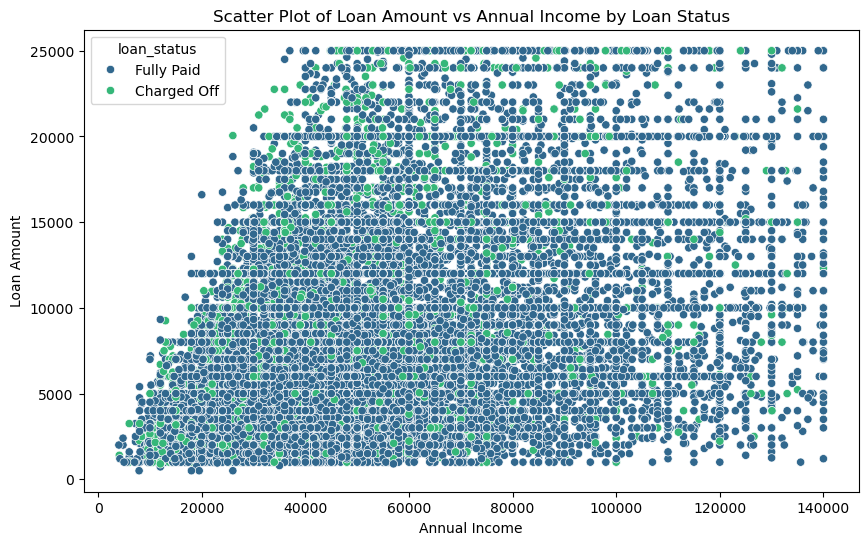

In [424]:
# Scatter plot between loan amount and annual income colored by loan status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='loan_amnt', hue='loan_status', data=loan_data, palette='viridis')
plt.title('Scatter Plot of Loan Amount vs Annual Income by Loan Status')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

<div class="alert alert-block alert-warning"><b>Conclusion:</b>  Nothing conclusive can be derived</b> </div>

---
#### 4. Installment

<b>Univariate Analysis</b>

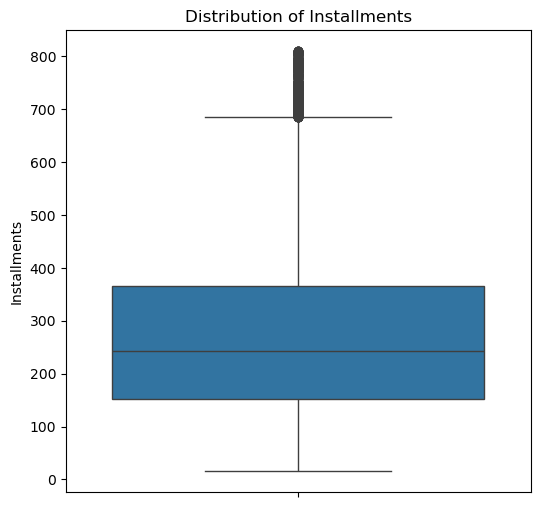

count    28292.000000
mean       271.605458
std        157.989648
min         15.690000
25%        152.415000
50%        243.340000
75%        365.392500
max        809.620000
Name: installment, dtype: float64

In [425]:
# Set size of plot
plt.figure(figsize=(6, 6))

#Plotting the box plot for installment
univariate_box_plot(data = loan_data, y_col = 'installment',  
                    title='Distribution of Installments', segment_col = None,
                    x_label=None, y_label='Installments')
loan_data['installment'].describe()

<div class="alert alert-block alert-warning"><b>Conclusion:</b> Median Installments is $243.34, which can be considered when setting average installment expectations for loans.</b></div>

<b>Segmented Univariate Analysis</b>

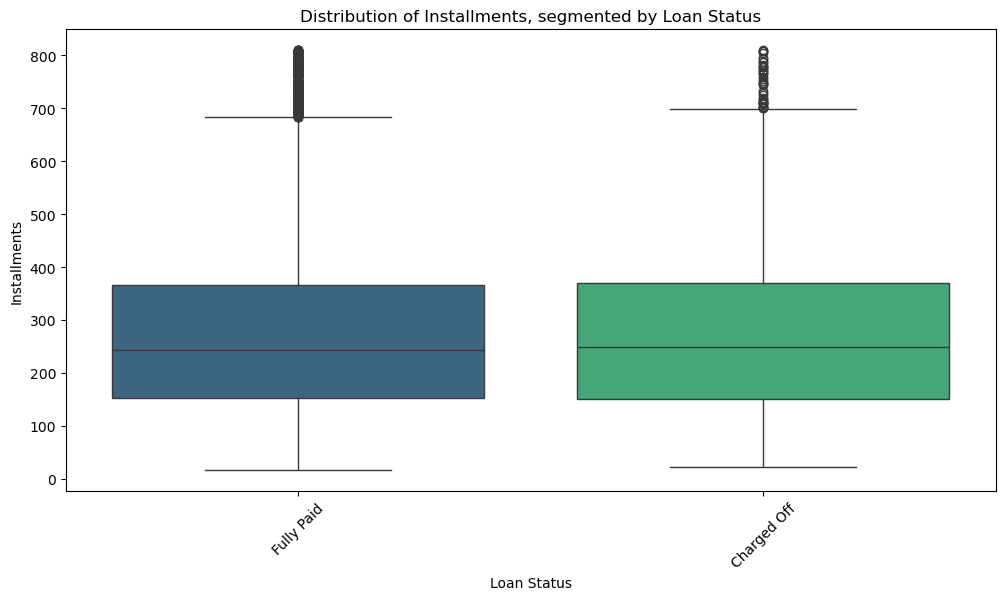

In [426]:
# Set size of plot
plt.figure(figsize=(12, 6))

#Plotting the box plot for loan_amnt segmented by loan_status
univariate_box_plot(data = loan_data, y_col = 'installment', segment_col = 'loan_status', 
                    title='Distribution of Installments, segmented by Loan Status', 
                    x_label='Loan Status', y_label='Installments')

<div class="alert alert-block alert-warning"><b>Conclusion:</b> Nothing conclusive can be derived</b></div>

---
#### 5. Monthly Installment as percent of Income

<b>Univariate Analysis</b>

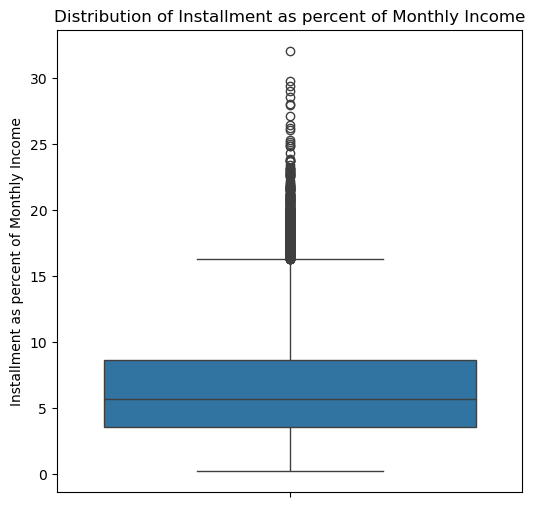

count    28292.000000
mean         6.459917
std          3.859304
min          0.220000
25%          3.530000
50%          5.710000
75%          8.630000
max         32.030000
Name: installment_as_percent_of_monthly_income, dtype: float64

In [427]:
# Set size of plot
plt.figure(figsize=(6, 6))

#Plotting the box plot for installment_as_percent_of_monthly_income
univariate_box_plot(data = loan_data, y_col = 'installment_as_percent_of_monthly_income',  
                    title='Distribution of Installment as percent of Monthly Income', segment_col = None,
                    x_label=None, y_label='Installment as percent of Monthly Income')
loan_data['installment_as_percent_of_monthly_income'].describe()

<div class="alert alert-block alert-warning"><b>Conclusion:</b> On Median, Installments is 5.71% of monthly income.</b></div>

<b>Segmented Univariate Analysis</b>

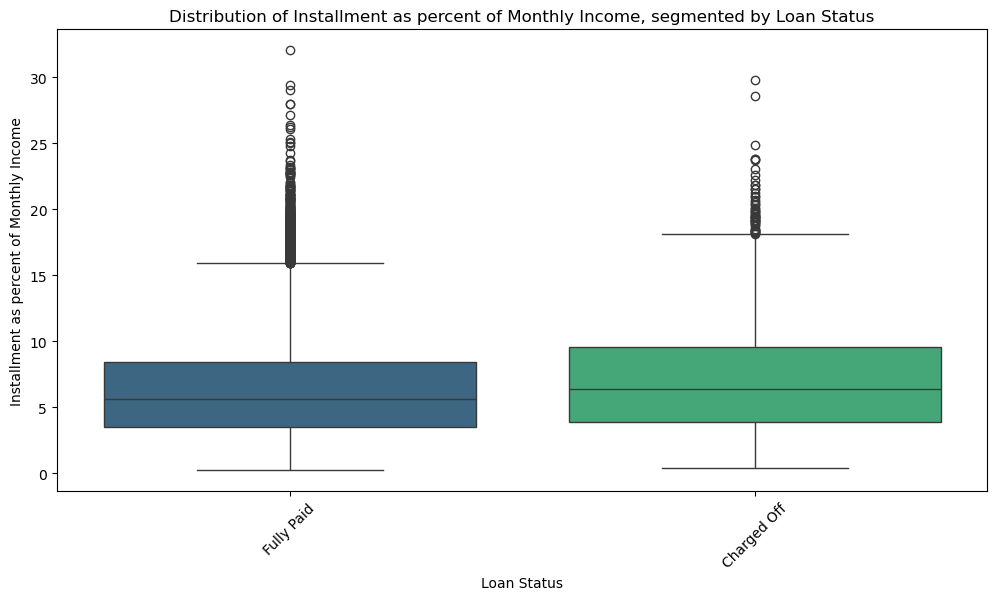

In [428]:
# Set size of plot
plt.figure(figsize=(12, 6))

#Plotting the box plot for installment_as_percent_of_monthly_income segmented by loan_status
univariate_box_plot(data = loan_data, y_col = 'installment_as_percent_of_monthly_income', segment_col = 'loan_status', 
                    title='Distribution of Installment as percent of Monthly Income, segmented by Loan Status', 
                    x_label='Loan Status', y_label='Installment as percent of Monthly Income')

<div class="alert alert-block alert-success"><b>Conclusion:</b>  Median, 25th and 75th percentile of charged-off loans is higher than that of fully paid loans. This means <b>Higher installment amount percent of consumer's monthly income are more likely to be charged off.</b> </div>

---
#### 6. Installment to loan ratio

<b>Univariate Analysis</b>

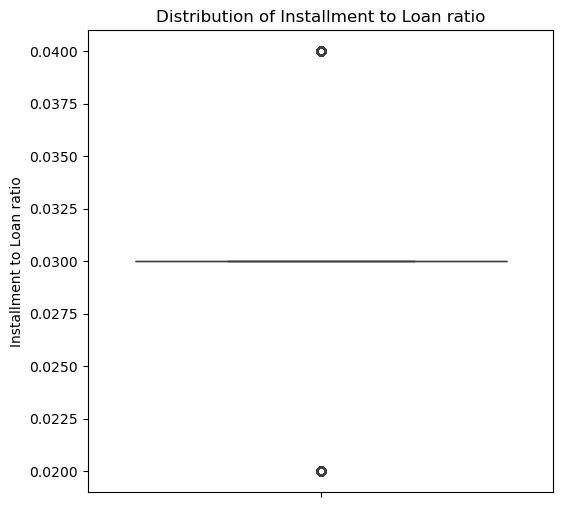

count    28292.000000
mean         0.028741
std          0.004598
min          0.020000
25%          0.030000
50%          0.030000
75%          0.030000
max          0.040000
Name: installment_to_loan_ratio, dtype: float64

In [429]:
# Set size of plot
plt.figure(figsize=(6, 6))

#Plotting the box plot for installment_to_loan_ratio
univariate_box_plot(data = loan_data, y_col = 'installment_to_loan_ratio',  
                    title='Distribution of Installment to Loan ratio', segment_col = None,
                    x_label=None, y_label='Installment to Loan ratio')
loan_data['installment_to_loan_ratio'].describe()

<div class="alert alert-block alert-warning"><b>Conclusion:</b> Installment to loan ratio doesn't seem to have much distribution</b></div>

<b>Segmented Univariate Analysis</b>

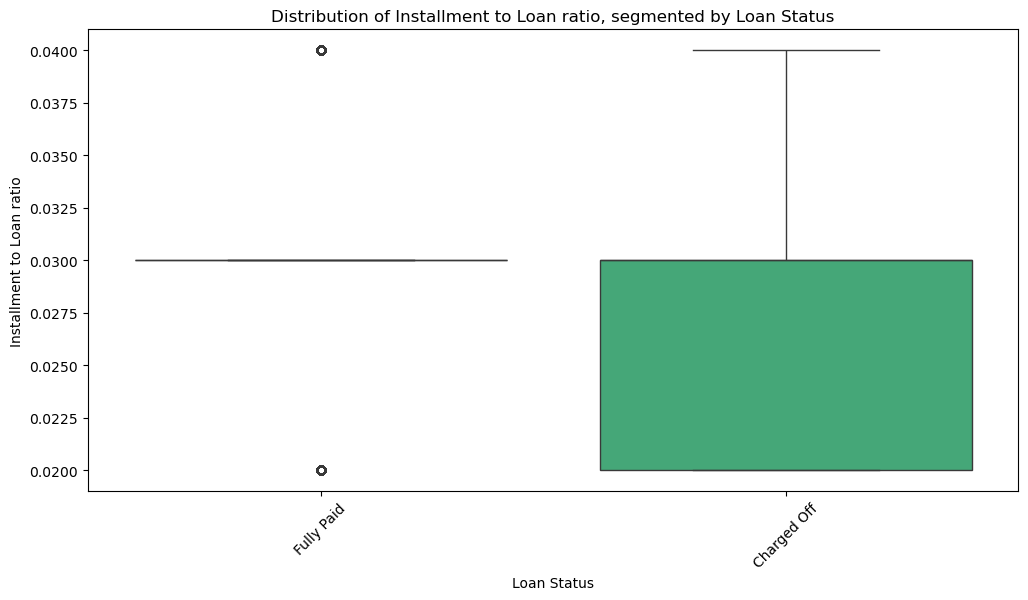

In [430]:
# Set size of plot
plt.figure(figsize=(12, 6))

#Plotting the box plot for installment_to_loan_ratio segmented by loan_status
univariate_box_plot(data = loan_data, y_col = 'installment_to_loan_ratio', segment_col = 'loan_status', 
                    title='Distribution of Installment to Loan ratio, segmented by Loan Status', 
                    x_label='Loan Status', y_label='Installment to Loan ratio')

<div class="alert alert-block alert-warning"><b>Conclusion:</b>  Even though the medians are the same, the increased spread for charged off loans could mean that loans with higher or lower ratios than the median are more prone to default.</b> </div>